# Couple candlestick for Long signal- Analytics

In [73]:
# the last one of 2 candlesticks is shaven head

### Import Library

In [74]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 6]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [75]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [76]:
data = dataset.copy()

In [77]:
# data = data[data.index < '2024-10-01 00:00:00']
# data = data[(data.index > '2020-11-01 00:00:00') & (data.index < '2024-10-01 00:00:00')]
data = data[data.index > '2020-11-01 00:00:00']

In [78]:
def set_condition_1(r):
    cond = ''
    if r['Open'] < r['Close'] <= r['High'] - 0.1:
        # Xanh va co bong nen tren
        cond = 'long'
    return cond


def set_condition_2(r):
    cond = ''
    if r['Open'] < r['Close'] == r['High'] and r['High'] > r['high_s1']:
        # Xanh va khong co bong nen tren
        cond = 'long'
    return cond
    

def get_couple_candleticks_signal(r):
    signal = ''
    if 100 * r.name.hour + r.name.minute >= 1425:
        return signal
    if r['condition_1'] == 'long' and r['condition_2'] == 'long':
        signal = 'long'
    return signal

In [79]:
# Couple candlesticks signal
data['low_s1'] = data['Low'].shift(1)
data['high_s1'] = data['High'].shift(1)
data['max_5'] = data['High'].rolling(5).max()
data['min_5'] = data['Low'].rolling(5).min()
data['condition_1'] = data.apply(lambda r: set_condition_1(r), axis=1)
data['condition_1'] = data['condition_1'].shift(1)
data['condition_2'] = data.apply(lambda r: set_condition_2(r), axis=1)
data['signal'] = data.apply(lambda r: get_couple_candleticks_signal(r), axis=1)

In [80]:
data[data['signal'] != '']

,Open,High,Low,Close,Volume,low_s1,high_s1,max_5,min_5,condition_1,condition_2,signal
Date,,,,,,,,,,,,
2020-11-04 10:05:00,908.2,909.0,908.1,909.0,1800,907.9,908.6,909.0,906.8,long,long,long
2020-11-04 10:15:00,910.2,911.5,909.8,911.5,3514,909.1,910.5,911.5,907.6,long,long,long
2020-11-04 10:35:00,911.2,912.5,910.8,912.5,2731,910.7,911.5,912.5,909.8,long,long,long
2020-11-04 11:00:00,913.5,914.2,912.8,914.2,1996,913.0,913.7,914.3,912.3,long,long,long
2020-11-06 13:40:00,904.5,906.7,904.4,906.7,2806,903.5,905.0,907.3,903.3,long,long,long
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-17 13:15:00,1341.5,1342.0,1341.1,1342.0,1977,1341.3,1341.8,1342.0,1341.1,long,long,long
2025-02-18 14:15:00,1337.2,1338.0,1336.5,1338.0,3803,1334.9,1337.7,1338.0,1334.9,long,long,long
2025-02-24 14:10:00,1357.7,1359.8,1357.4,1359.8,5130,1356.3,1358.6,1359.8,1355.0,long,long,long


## Trap labeling

In [81]:
traps = []
for i, row in data.iterrows():
    if row['signal']:
        current_date = row.name.strftime('%Y-%m-%d ').format()
        current_time = row.name
        data_to_end_day = data[(data.index > current_time) & (data.index < current_date + ' 14:30:00')]
        #
        data_at_end_day = data[data.index == current_date + ' 14:25:00']
        last_close = data_at_end_day.iloc[0]['Close']
        #
        if len(data_to_end_day[data_to_end_day.Low < row['Close'] - 3.5]) > 0 or row['Close'] > last_close:
            traps.append(1)
        else:
            traps.append(0)
    else:
        traps.append(0)

In [82]:
data['trap'] = traps

In [83]:
data[data.trap != 0]

,Open,High,Low,Close,Volume,low_s1,high_s1,max_5,min_5,condition_1,condition_2,signal,trap
Date,,,,,,,,,,,,,
2020-11-04 11:00:00,913.5,914.2,912.8,914.2,1996,913.0,913.7,914.3,912.3,long,long,long,1
2020-11-10 10:30:00,929.3,930.0,929.2,930.0,1369,928.6,929.5,931.1,928.1,long,long,long,1
2020-11-11 10:50:00,921.4,921.9,920.9,921.9,1331,920.8,921.6,921.9,919.4,long,long,long,1
2020-11-18 09:30:00,937.4,938.7,937.3,938.7,1431,936.7,937.9,938.8,936.6,long,long,long,1
2020-11-19 13:10:00,941.1,942.9,941.1,942.9,2346,940.6,941.1,942.9,939.6,long,long,long,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-17 10:10:00,1338.7,1340.0,1338.7,1340.0,2620,1338.0,1338.8,1340.0,1338.0,long,long,long,1
2025-02-17 10:45:00,1339.7,1340.4,1339.4,1340.4,955,1339.3,1340.0,1340.9,1339.2,long,long,long,1
2025-02-17 13:15:00,1341.5,1342.0,1341.1,1342.0,1977,1341.3,1341.8,1342.0,1341.1,long,long,long,1


In [84]:
data[(data.signal != '') & (data.trap == 0)]

,Open,High,Low,Close,Volume,low_s1,high_s1,max_5,min_5,condition_1,condition_2,signal,trap
Date,,,,,,,,,,,,,
2020-11-04 10:05:00,908.2,909.0,908.1,909.0,1800,907.9,908.6,909.0,906.8,long,long,long,0
2020-11-04 10:15:00,910.2,911.5,909.8,911.5,3514,909.1,910.5,911.5,907.6,long,long,long,0
2020-11-04 10:35:00,911.2,912.5,910.8,912.5,2731,910.7,911.5,912.5,909.8,long,long,long,0
2020-11-06 13:40:00,904.5,906.7,904.4,906.7,2806,903.5,905.0,907.3,903.3,long,long,long,0
2020-11-09 10:40:00,918.1,919.0,918.0,919.0,2128,917.6,918.2,919.0,917.2,long,long,long,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-05 13:50:00,1331.9,1333.4,1331.5,1333.4,5276,1330.6,1331.8,1333.4,1329.6,long,long,long,0
2025-02-13 10:40:00,1328.7,1329.8,1328.6,1329.8,4716,1327.4,1328.8,1329.8,1326.2,long,long,long,0
2025-02-13 13:15:00,1333.8,1335.9,1333.6,1335.9,6130,1333.1,1333.9,1335.9,1332.8,long,long,long,0


In [85]:
real_signal_rate = len(data[(data.signal != '') & (data.trap == 0)]) / len(data[data.signal != ''])
real_signal_rate

0.37207207207207205

## Analytics

In [86]:
data['RSI'] = ta.rsi(data["Close"], length=14)
data['RSI'] = round(data['RSI'])
data["ATR"] = ta.atr(data['High'], data['Low'], data['Close'], length=14)
adx42 = ta.adx(data['High'], data['Low'], data['Close'], length=42)
adx5 = ta.adx(data['High'], data['Low'], data['Close'], length=5)
data = data.assign(ADX42=adx42['ADX_42'])
data = data.assign(ADX5=adx5['ADX_5'])
macd = ta.macd(data['Close'], 26, 12, 9)
data = data.assign(MACDh=macd['MACDh_12_26_9']).rename(columns={'MACDh_12_26_9': 'MACDh'})    # Histogram

## 24. Volume std

In [167]:
df24 = data[["Open", "Close", "High", "Low", "Volume", "signal", "trap"]].copy()
df24['vol_std'] = df24['Volume'].rolling(20).std()
df24['vol_diff'] = df24['Volume'].diff()
signal_data = df24[df24.signal != '']
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

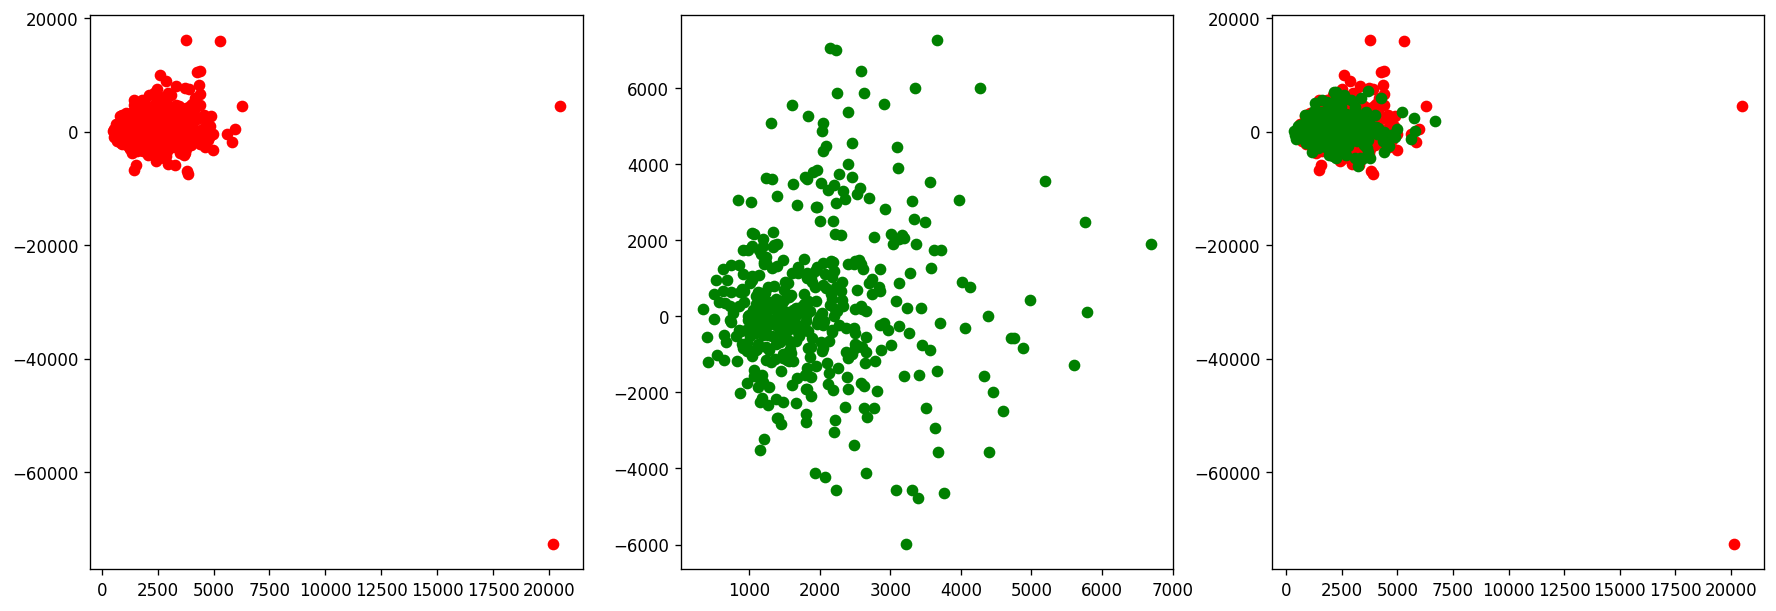

In [168]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['vol_std'], trap_signals['vol_diff'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['vol_std'], real_signals['vol_diff'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['vol_std'], trap_signals['vol_diff'], c='red')
plt.scatter(real_signals['vol_std'], real_signals['vol_diff'], c='green')

## 23. Volume on Avg_Volume

In [162]:
df23 = data[["Open", "Close", "High", "Low", "Volume", "signal", "trap"]].copy()
df23['avg_vol'] = df23['Volume'].rolling(20).mean()
df23['vol_on_avg_vol'] = df23['Volume'] / df23['avg_vol']
df23['vol_on_avg_vol'] = round(df23['vol_on_avg_vol'], 1)
df23.dropna(inplace=True)

In [163]:
signal_data = df23[df23.signal != '']

<Axes: xlabel='vol_on_avg_vol'>

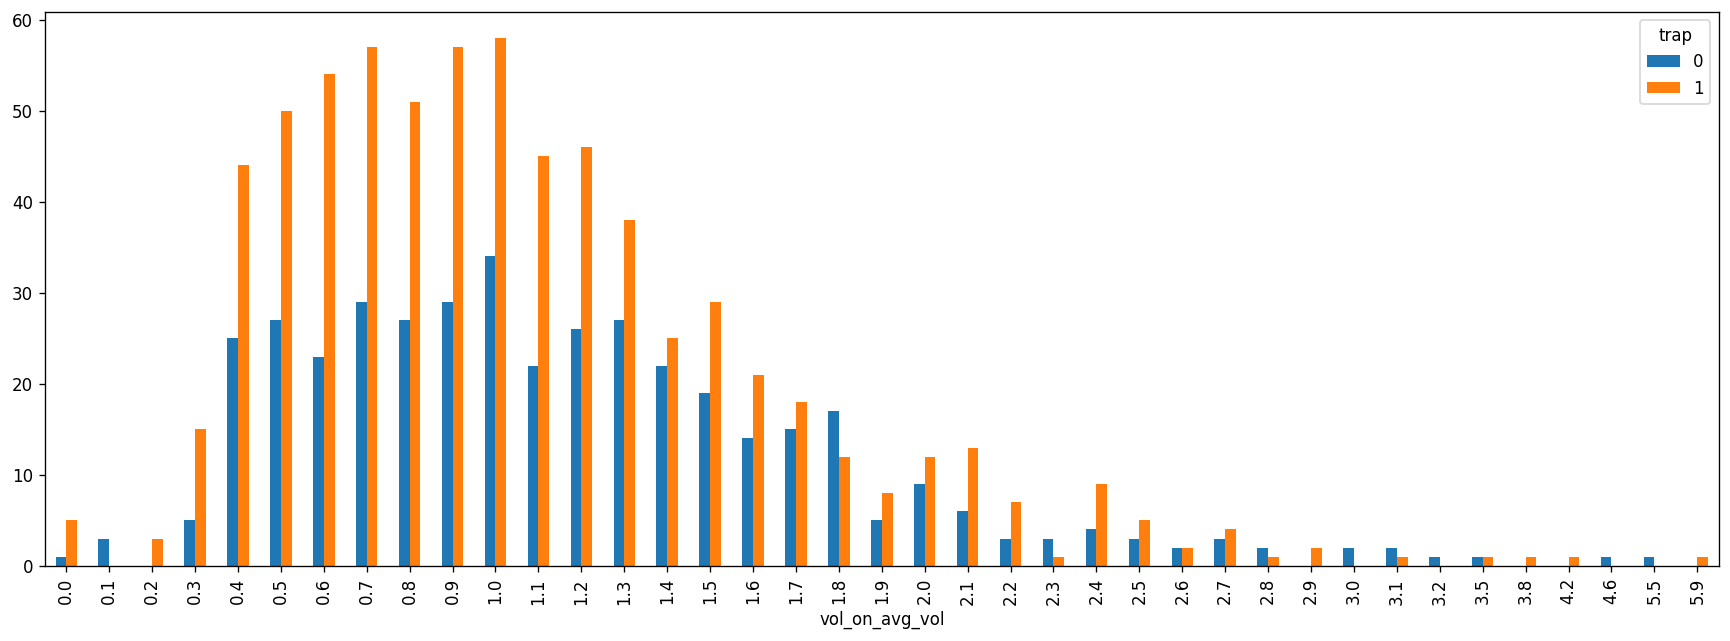

In [164]:
signal_group_by_last_hl_range = signal_data.groupby(['vol_on_avg_vol', 'trap'])['vol_on_avg_vol'].count().rename({'vol_on_avg_vol': 'count'})
signal_group_by_last_hl_range.unstack().plot.bar()

## 22. Yestterday High - Low

In [87]:
df22 = data[["Open", "Close", "High", "Low", "Volume", "signal", "trap"]].copy()
day_data = df20[['High', 'Low']].resample('D').agg({
    'High': 'max',
    'Low': 'min'
}).rename(columns={'High': 'DHigh', 'Low': 'DLow'})
day_data.dropna(subset="DHigh", inplace=True)
day_data['prev_HL_range'] = day_data['DHigh'] - day_data['DLow']
day_data['prev_HL_range'] = round(day_data['prev_HL_range'])
df22 = df22.assign(time_d=pd.PeriodIndex(df22.index, freq='1D').to_timestamp())
df_merged = pd.merge(df22, day_data, left_on="time_d", right_index=True, how="left")

In [88]:
signal_data = df_merged[df_merged.signal != '']

<Axes: xlabel='prev_HL_range'>

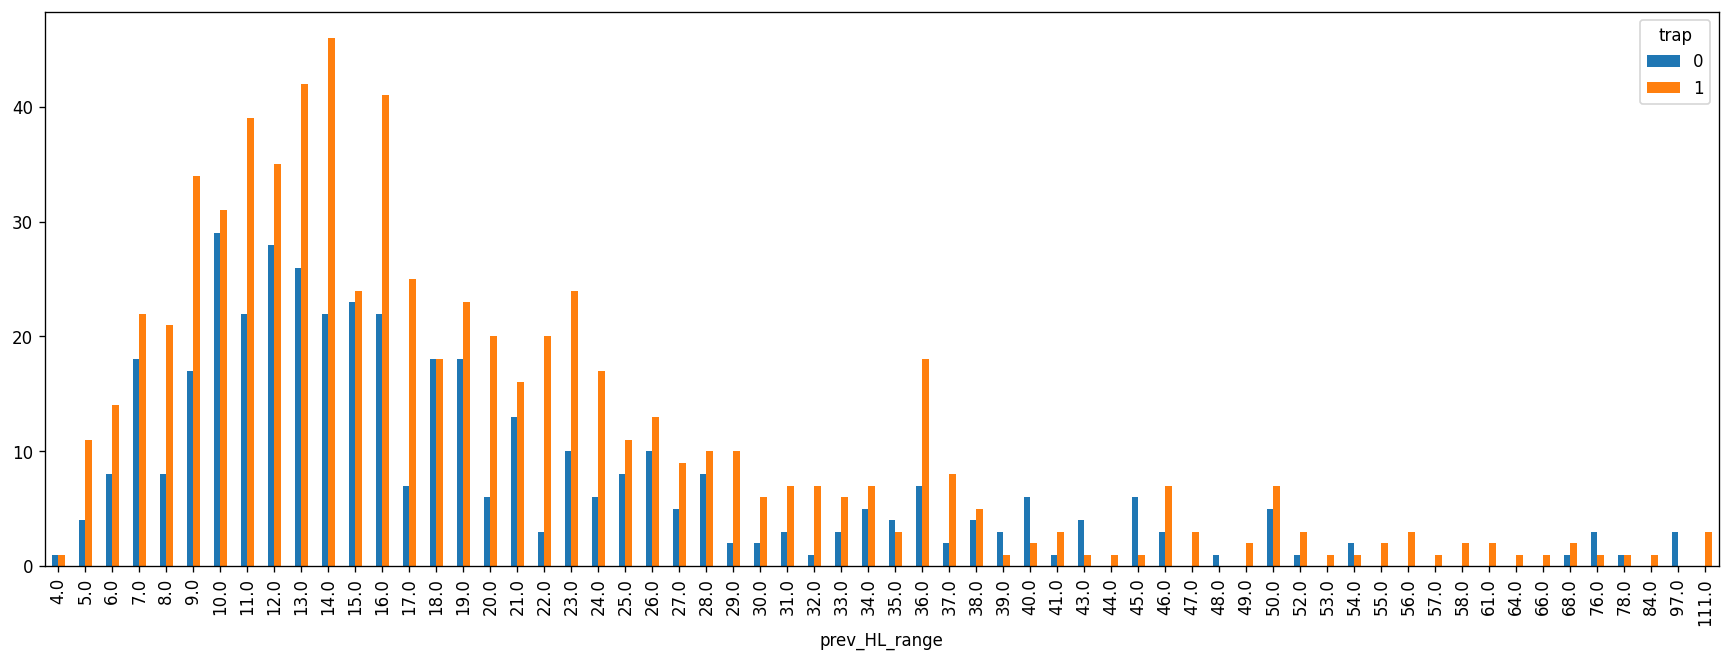

In [89]:
signal_group_by_last_hl_range = signal_data.groupby(['prev_HL_range', 'trap'])['prev_HL_range'].count().rename({'prev_HL_range': 'count'})
signal_group_by_last_hl_range.unstack().plot.bar()

## 21. Today High - Low

In [90]:
df21 = data[["Open", "Close", "High", "Low", "Volume", "signal", "trap"]].copy()
highs = []
lows = []
first_close = []
_9am_Close = 0
for i, row in df21.iterrows():
    if row.name.hour == 9 and row.name.minute == 0:
        _9am_Close = row['Close']
    first_close.append(_9am_Close)
    if row['signal']:
        current_date = row.name.strftime('%Y-%m-%d ').format()
        current_time = row.name
        data_from_9am = data[(data.index < current_time) & (data.index >= current_date + ' 09:00:00')]
        max_high = data_from_9am['High'].max()
        min_low = data_from_9am['Low'].min()
        highs.append(max_high)
        lows.append(min_low)
    else:
        highs.append(2)
        lows.append(1)

In [91]:
df21['prev_highest'] = highs
df21['prev_lowest'] = lows
df21['first_close'] = first_close

In [92]:
signal_data

,Open,Close,High,Low,Volume,signal,trap,time_d,DHigh,DLow,prev_HL_range
Date,,,,,,,,,,,
2020-11-04 10:05:00,908.2,909.0,909.0,908.1,1800,long,0,2020-11-04,918.1,906.7,11.0
2020-11-04 10:15:00,910.2,911.5,911.5,909.8,3514,long,0,2020-11-04,918.1,906.7,11.0
2020-11-04 10:35:00,911.2,912.5,912.5,910.8,2731,long,0,2020-11-04,918.1,906.7,11.0
2020-11-04 11:00:00,913.5,914.2,914.2,912.8,1996,long,1,2020-11-04,918.1,906.7,11.0
2020-11-06 13:40:00,904.5,906.7,906.7,904.4,2806,long,0,2020-11-06,912.7,903.3,9.0
...,...,...,...,...,...,...,...,...,...,...,...
2025-02-17 13:15:00,1341.5,1342.0,1342.0,1341.1,1977,long,1,2025-02-17,1342.1,1335.3,7.0
2025-02-18 14:15:00,1337.2,1338.0,1338.0,1336.5,3803,long,0,2025-02-18,1348.3,1331.5,17.0
2025-02-24 14:10:00,1357.7,1359.8,1359.8,1357.4,5130,long,0,2025-02-24,1366.8,1350.1,17.0


In [93]:
signal_data = df21[df21.signal != '']
signal_data['custom_rate'] = signal_data.apply(lambda r: (r['Close'] - r['first_close']) / (r['prev_highest'] - r['prev_lowest']), axis=1)
signal_data['custom_rate'] = round(signal_data['custom_rate'], 1)

<Axes: xlabel='custom_rate'>

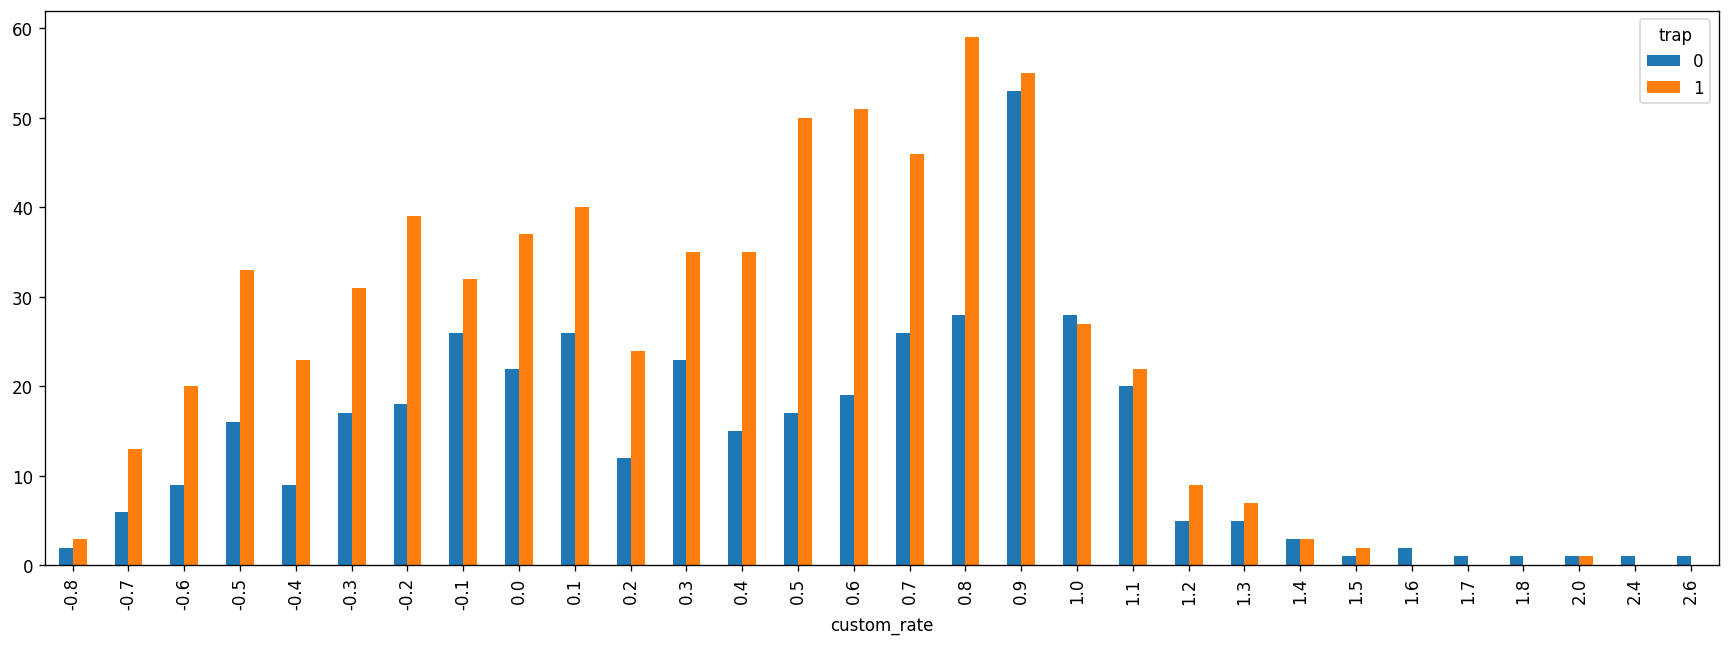

In [94]:
signal_group_by_custom_rate = signal_data.groupby(['custom_rate', 'trap'])['custom_rate'].count().rename({'custom_rate': 'count'})
signal_group_by_custom_rate.unstack().plot.bar()

## 20. Yestreday High - Low - Close

In [95]:
df20 = data[["Open", "Close", "High", "Low", "Volume", "signal", "trap"]].copy()
day_data = df20[['Close', 'High', 'Low']].resample('D').agg({
    'Close': 'last',
    'High': 'max',
    'Low': 'min'
}).rename(columns={'Close': 'DClose', 'High': 'DHigh', 'Low': 'DLow'})
day_data['DClose'] = day_data['DClose'].shift(1)
day_data['DHigh'] = day_data['DHigh'].shift(1)
day_data['DLow'] = day_data['DLow'].shift(1)
day_data.dropna(subset="DClose", inplace=True)

In [96]:
df20 = df20.assign(time_d=pd.PeriodIndex(df20.index, freq='1D').to_timestamp())
df_merged = pd.merge(df20, day_data, left_on="time_d", right_index=True, how="left")

In [97]:
signal_data = df_merged[df_merged.signal != '']
signal_data['rate_x'] = signal_data.apply(
        lambda r: 100 * (r['Close'] - r['DClose']) / r['DClose'], axis=1)
# signal_data['rate_y'] = signal_data.apply(
#     lambda r: (r['DHigh'] - r['DLow']) / r['Close'], axis=1)
signal_data['rate_y'] = signal_data.apply(lambda r: (r['Close'] - r['DClose']) / (r['DHigh'] - r['DLow']), axis=1)
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

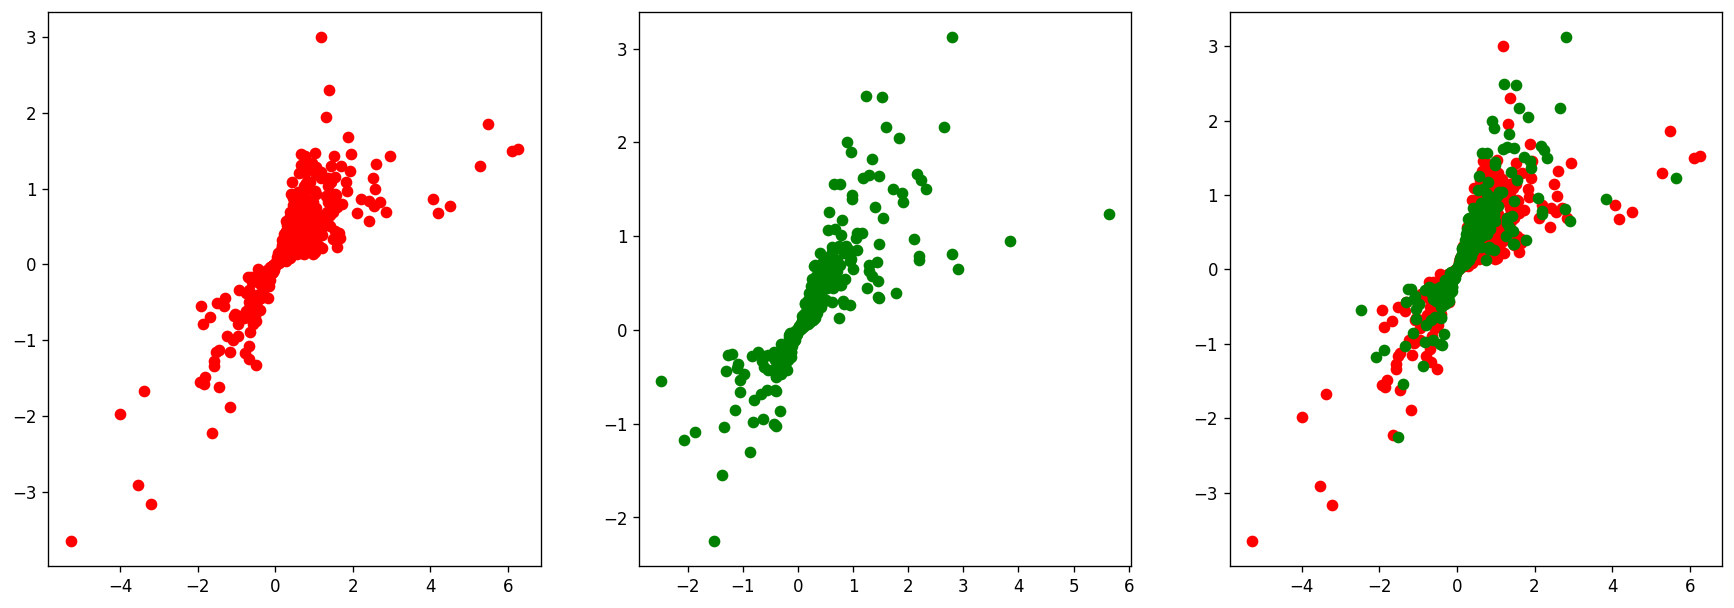

In [98]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['rate_x'], trap_signals['rate_y'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['rate_x'], real_signals['rate_y'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['rate_x'], trap_signals['rate_y'], c='red')
plt.scatter(real_signals['rate_x'], real_signals['rate_y'], c='green')

## 19. Price speed & Volume change

In [99]:
df19 = data[["Open", "Close", "High", "Low", "Volume", "signal", "trap"]].copy()
df19['Price_Velocity'] = df19['Close'].diff()  # Price speed
df19['Volume_Change'] = df19['Volume'].pct_change()  # Volume spikes
signal_data = df19[(df19.signal != '') & (df19.Volume_Change < 50)]
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

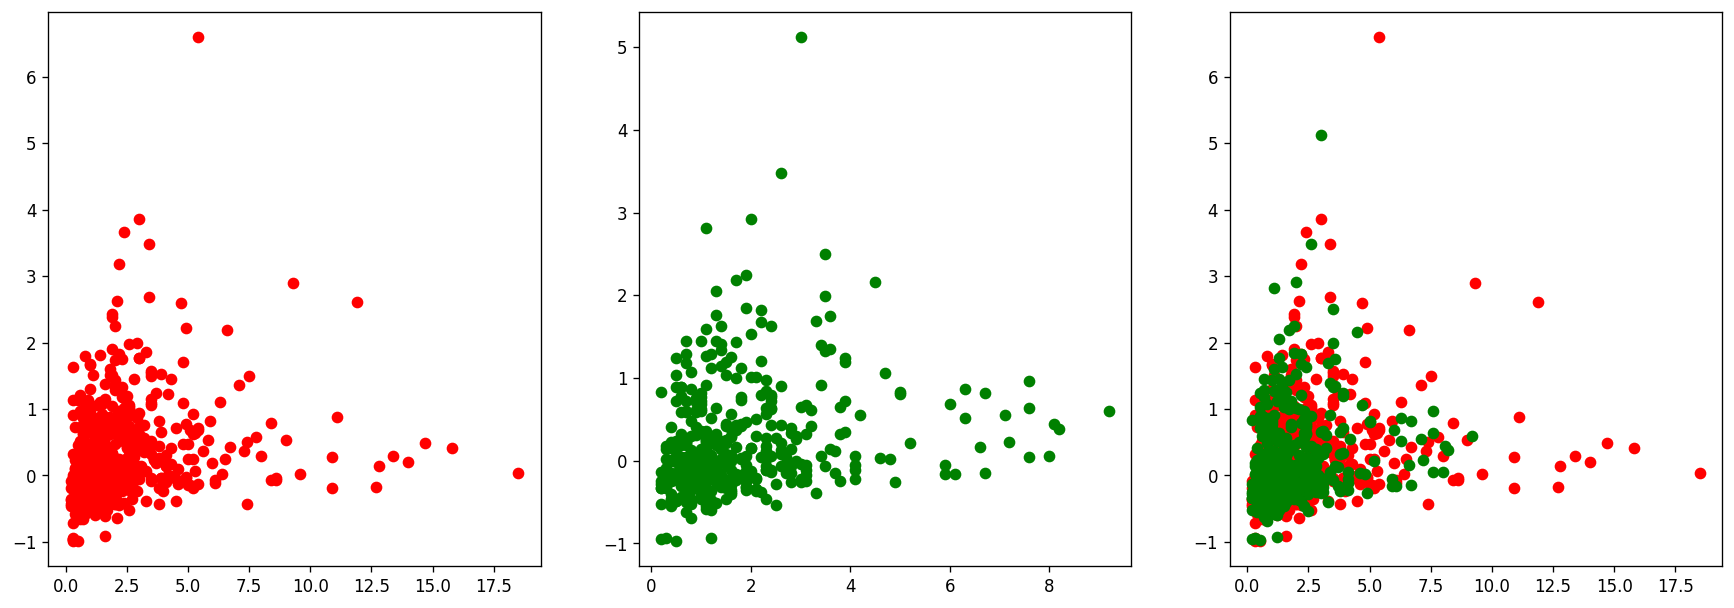

In [100]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['Price_Velocity'], trap_signals['Volume_Change'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['Price_Velocity'], real_signals['Volume_Change'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['Price_Velocity'], trap_signals['Volume_Change'], c='red')
plt.scatter(real_signals['Price_Velocity'], real_signals['Volume_Change'], c='green')

## 18. Sum body and height last 5 candlesticks

In [101]:
df18 = data[["Open", "Close", "High", "Low", "RSI", "signal", "trap"]].copy()
df18['body'] = df18.apply(lambda r: r['Close'] - r['Open'], axis=1)
df18['sum_body'] = df18['body'].rolling(10).sum()
df18['sum_body'] = round(df18['sum_body'], 1)
df18['height'] = df18.apply(lambda r: r['High'] - r['Low'], axis=1)
df18['sum_height'] = df18['height'].rolling(10).sum()
df18['sum_height'] = round(df18['sum_height'], 1)
signal_data = df18[df18.signal != '']
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

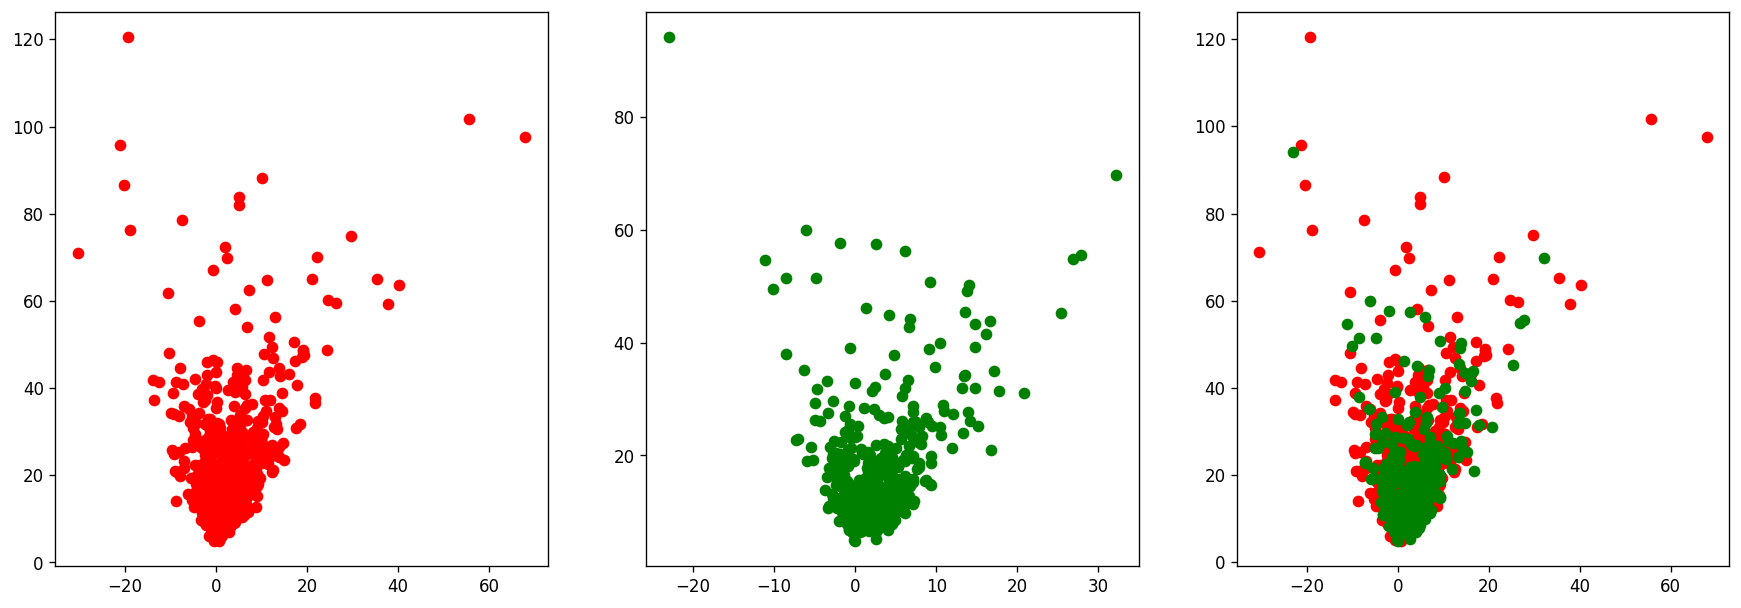

In [102]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['sum_body'], trap_signals['sum_height'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['sum_body'], real_signals['sum_height'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['sum_body'], trap_signals['sum_height'], c='red')
plt.scatter(real_signals['sum_body'], real_signals['sum_height'], c='green')

<Axes: xlabel='custom_rate'>

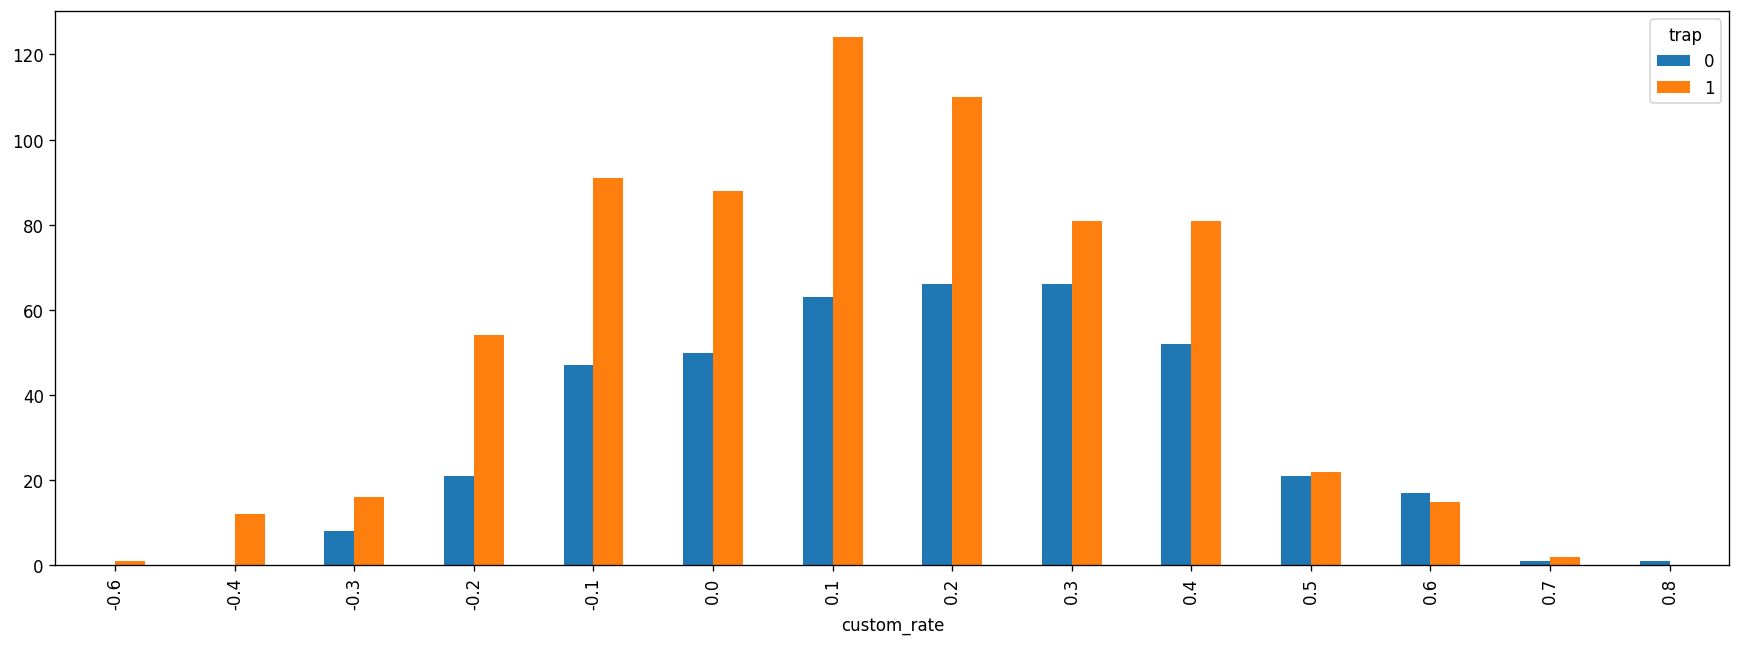

In [103]:
signal_data['custom_rate'] = signal_data['sum_body'] / signal_data['sum_height']
signal_data['custom_rate'] = round(signal_data['custom_rate'], 1)
signal_group_by_custom_rate = signal_data.groupby(['custom_rate', 'trap'])['custom_rate'].count().rename({'custom_rate': 'count'})
signal_group_by_custom_rate.unstack().plot.bar()

## 17. Sum 5 last IBSs

In [104]:
df17 = data[["Open", "Close", "High", "Low", "RSI", "signal", "trap"]].copy()
df17['ibs'] = df17.apply(lambda r: 0 if r['High'] == r['Close'] else (r['Close'] - r['Low']) / (r['High'] - r['Low']), axis=1)
df17['sum_ibs'] = df17['ibs'].rolling(5).sum()
df17['sum_ibs'] = round(df17['sum_ibs'], 1)
signal_data = df17[df17.signal != '']
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

<Axes: xlabel='sum_ibs'>

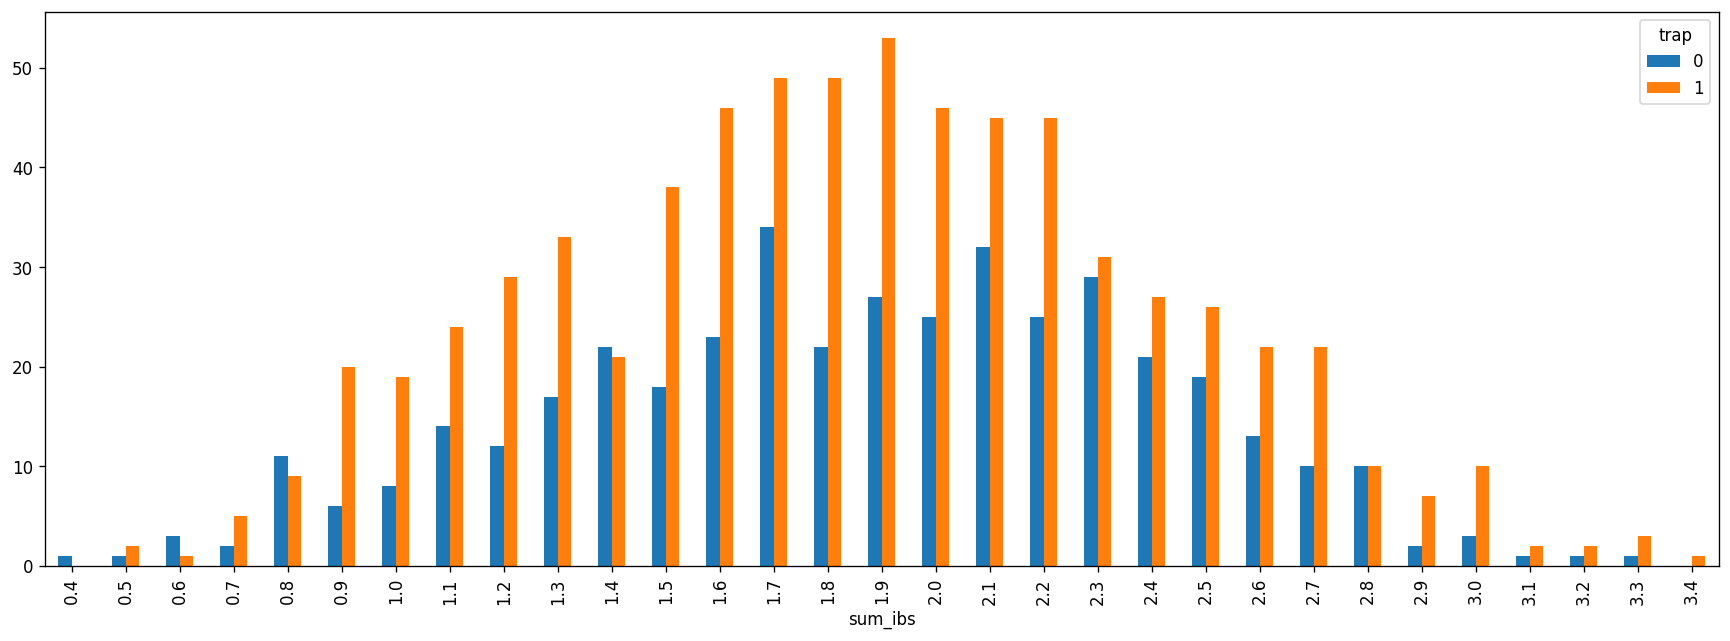

In [105]:
signal_group_by_custom_ibs = signal_data.groupby(['sum_ibs', 'trap'])['sum_ibs'].count().rename({'sum_ibs': 'count'})
signal_group_by_custom_ibs.unstack().plot.bar()

## 16. High-Low Range 10 and Close and Open shift

In [106]:
df16 = data[["Open", "Close", "High", "Low", "RSI", "signal", "trap"]].copy()
df16['max_10'] = df16['High'].rolling(10).max()
df16['min_10'] = df16['Low'].rolling(10).min()
df16['range_10'] = df16['max_10'] - df16['min_10']
df16['range_10'] = round(df16['range_10'], 1)
df16['bodyc'] = df16['Close'] - df16['Open'].shift(1)
signal_data = df16[df16.signal != '']
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

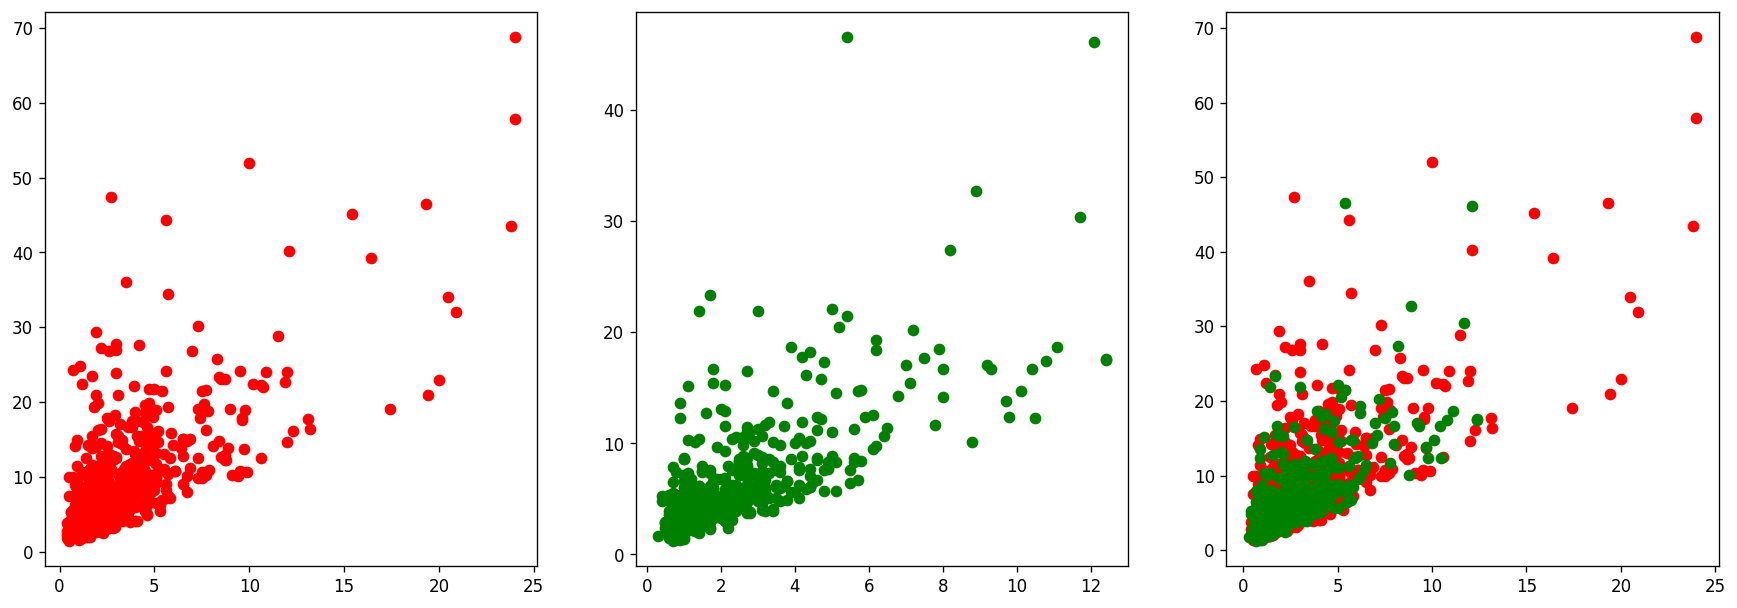

In [107]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['bodyc'], trap_signals['range_10'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['bodyc'], real_signals['range_10'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['bodyc'], trap_signals['range_10'], c='red')
plt.scatter(real_signals['bodyc'], real_signals['range_10'], c='green')

## 15. Volume to last 2 volumes

In [108]:
df15 = data[["Open", "Close", "High", "Low", "signal", "Volume", "trap"]].copy()
df15['diff1'] = df15['Volume'] - df15['Volume'].shift(1)
df15['diff2'] = df15['Volume'] - df15['Volume'].shift(2)
df15['diff1'] = df15['diff1'] / 1000
df15['diff2'] = df15['diff2'] / 1000
#
signal_data = df15[df15.signal != '']
signal_data.dropna(inplace=True)
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

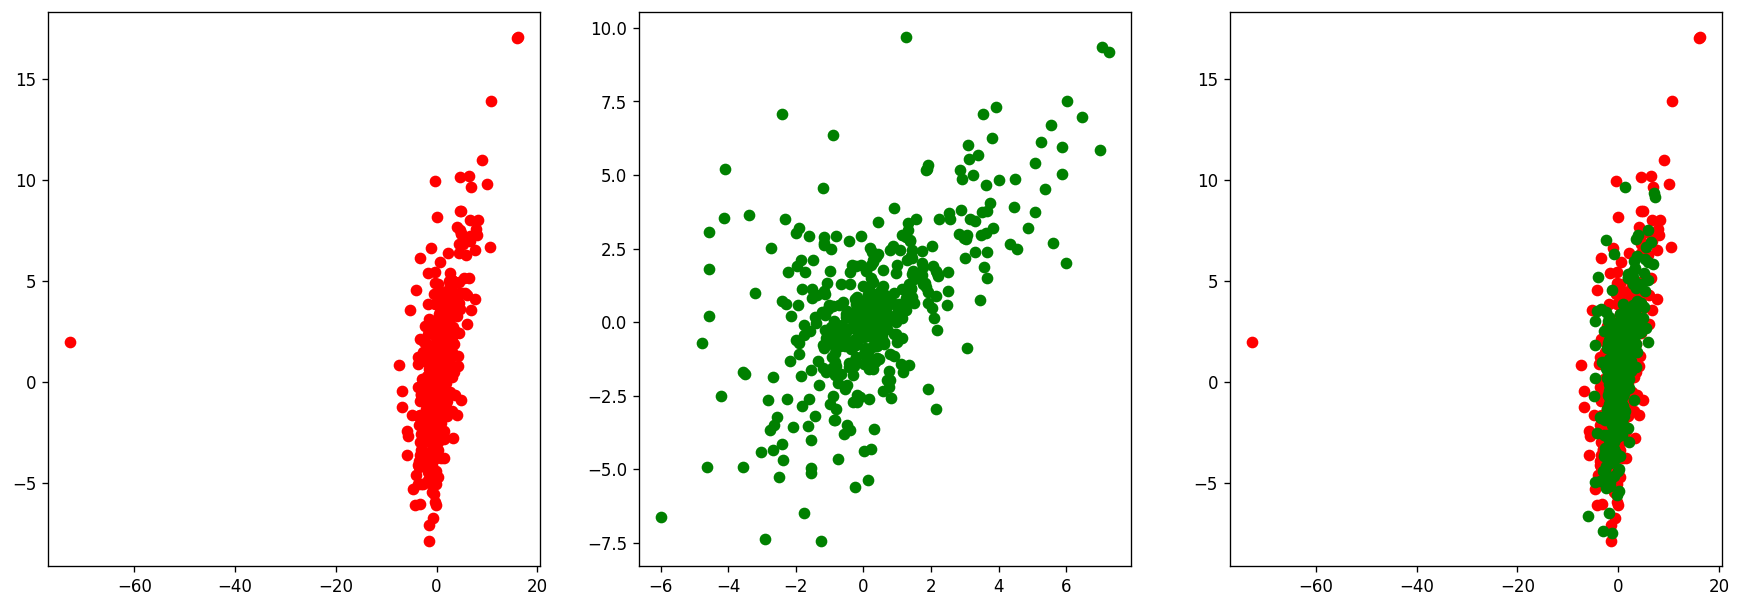

In [109]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['diff1'], trap_signals['diff2'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['diff1'], real_signals['diff2'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['diff1'], trap_signals['diff2'], c='red')
plt.scatter(real_signals['diff1'], real_signals['diff2'], c='green')

## 14. Volume to max-min Volume

In [110]:
df14 = data[["Open", "Close", "High", "Low", "signal", "Volume", "trap"]].copy()
df14['max_Vol'] = df14['Volume'].shift(1).rolling(20).max()
df14['min_Vol'] = df14['Volume'].shift(1).rolling(20).min()
df14['diffMaxVolume'] = (df14['Volume'] - df14['max_Vol']) / 1000
df14['diffMinVolume'] = (df14['Volume'] - df14['min_Vol']) / 1000
#
signal_data = df14[df14.signal != '']
signal_data.dropna(inplace=True)
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

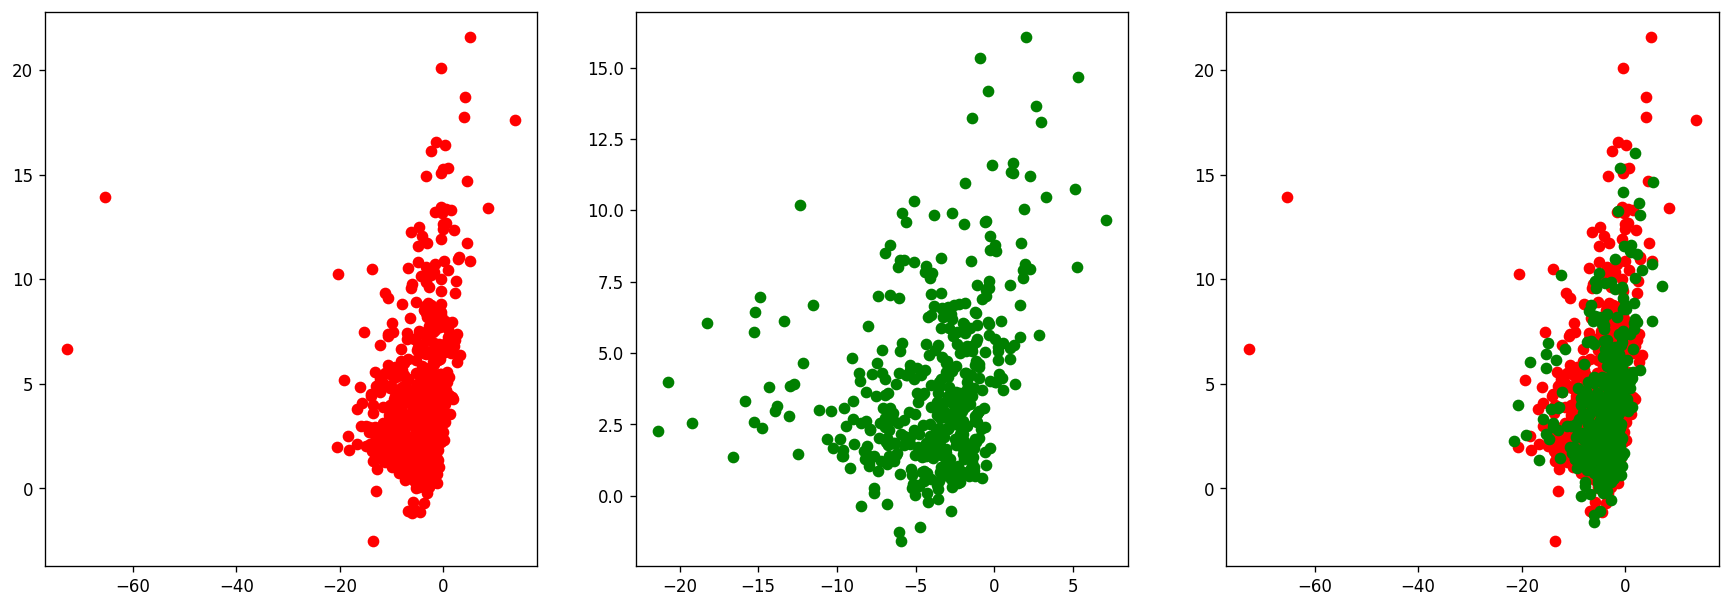

In [111]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['diffMaxVolume'], trap_signals['diffMinVolume'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['diffMaxVolume'], real_signals['diffMinVolume'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['diffMaxVolume'], trap_signals['diffMinVolume'], c='red')
plt.scatter(real_signals['diffMaxVolume'], real_signals['diffMinVolume'], c='green')

## 13. Next candlestick & next Volume

In [112]:
df13 = data[["Open", "Close", "High", "Low", "signal", "Volume", "trap"]].copy()
df13['diffNextClose'] = df13['Close'].shift(-1) - df13['Close']
df13['diffNextClose'] = round(df13['diffNextClose'], 1)
df13['diffNextVolume'] = (df13['Volume'].shift(-1) - df13['Volume']) / df13['Volume']
df13['diffNextVolume']  = round(df13['diffNextVolume'] , 1)
#
signal_data = df13[df13.signal != '']
signal_data.dropna(inplace=True)
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

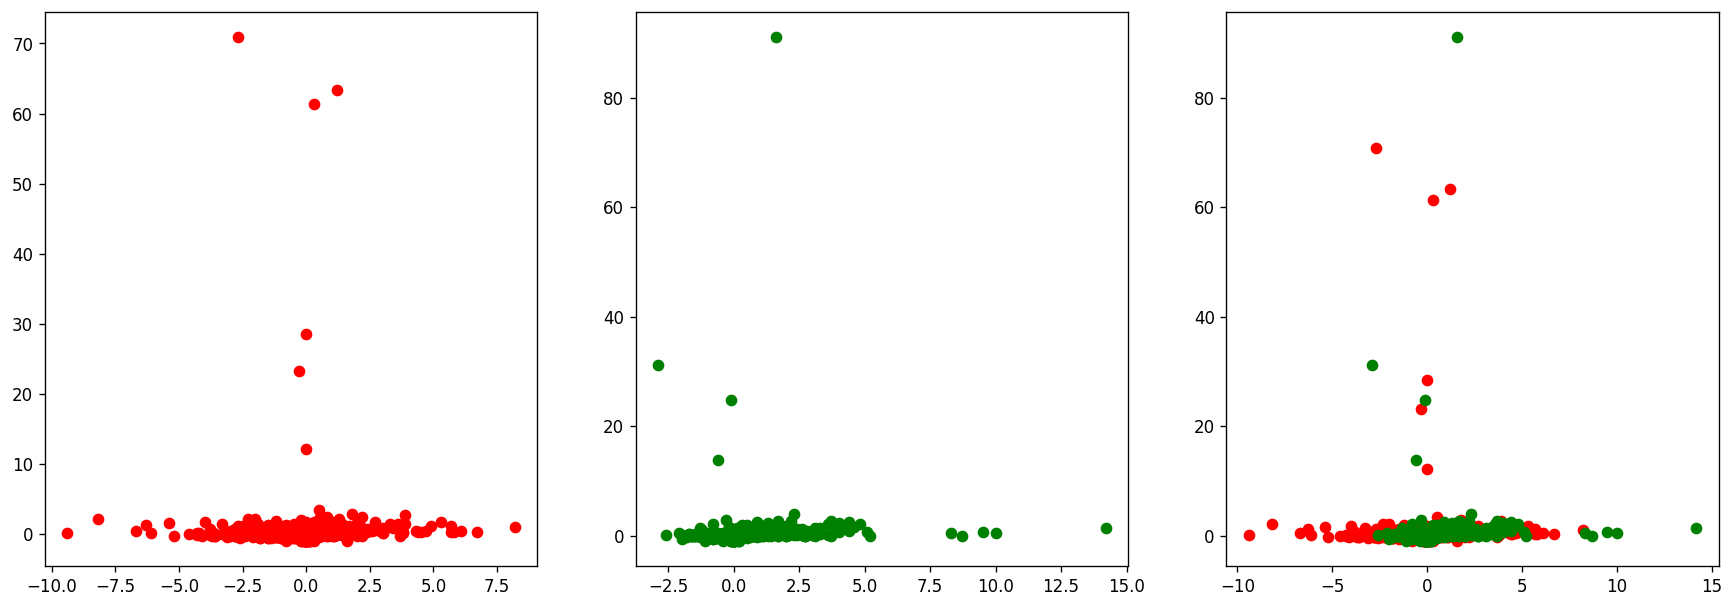

In [113]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['diffNextClose'], trap_signals['diffNextVolume'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['diffNextClose'], real_signals['diffNextVolume'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['diffNextClose'], trap_signals['diffNextVolume'], c='red')
plt.scatter(real_signals['diffNextClose'], real_signals['diffNextVolume'], c='green')

In [114]:
# quantile signal data
deq_low = real_signals["diffNextClose"].quantile(0.01)
deq_high  = real_signals["diffNextClose"].quantile(0.99)
quantile_data = real_signals[(real_signals["diffNextClose"] < deq_high) & (real_signals["diffNextClose"] > deq_low)]
quantile_data['diffNextClose'].min()

-1.8

In [115]:
quantile_data['diffNextClose'].max()

5.2

In [116]:
signal_data['diffNextClose'].min()

-9.4

## 12. Couple price move

In [117]:
df12 = data[["Open", "Close", "High", "Low", "signal", "ATR", "trap"]].copy()
df12['price_move1'] = df12['Close'] - df12['Close'].shift(1)
df12['price_move2'] = df12['Close'].shift(1) - df12['Close'].shift(2)
df12['price_move1'] = round(df12['price_move1'], 1)
df12['price_move2'] = round(df12['price_move2'], 1)
#
signal_data = df12[df12.signal != '']
signal_data.dropna(inplace=True)
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

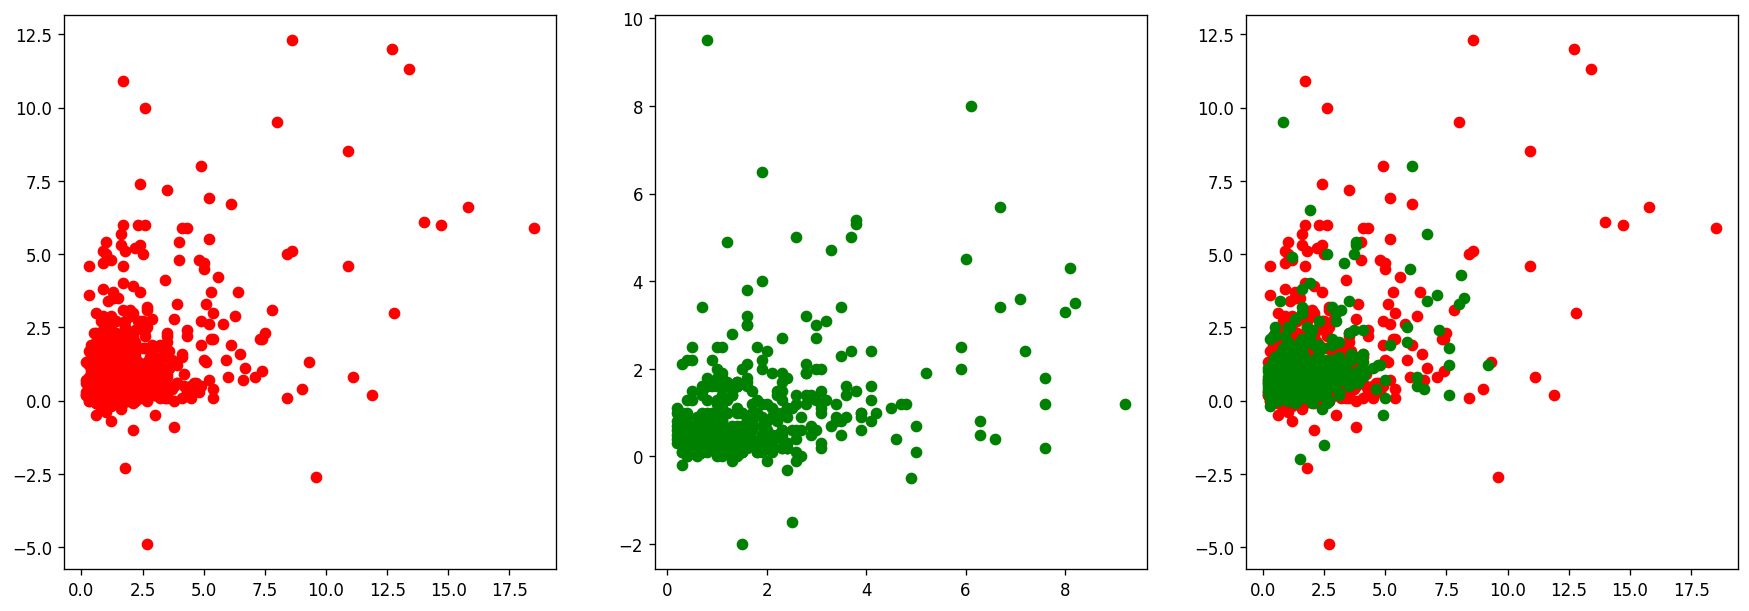

In [118]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['price_move1'], trap_signals['price_move2'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['price_move1'], real_signals['price_move2'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['price_move1'], trap_signals['price_move2'], c='red')
plt.scatter(real_signals['price_move1'], real_signals['price_move2'], c='green')

## 11. Distance from Close to EMA_20 & EMA_20 to EMA_250

In [119]:
df11= data[["Open", "Close", "High", "Low", "signal", "trap"]].copy()
#
df11["ema_f"] = ta.ema(df11["Close"], length=26)
df11["ema_l"] = ta.ema(df11["Close"], length=250)
df11["distance_1"] = df11["Close"] - df11["ema_f"]
df11["distance_2"] = df11["ema_f"] - df11["ema_l"]
#
signal_data = df11[df11.signal != '']
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

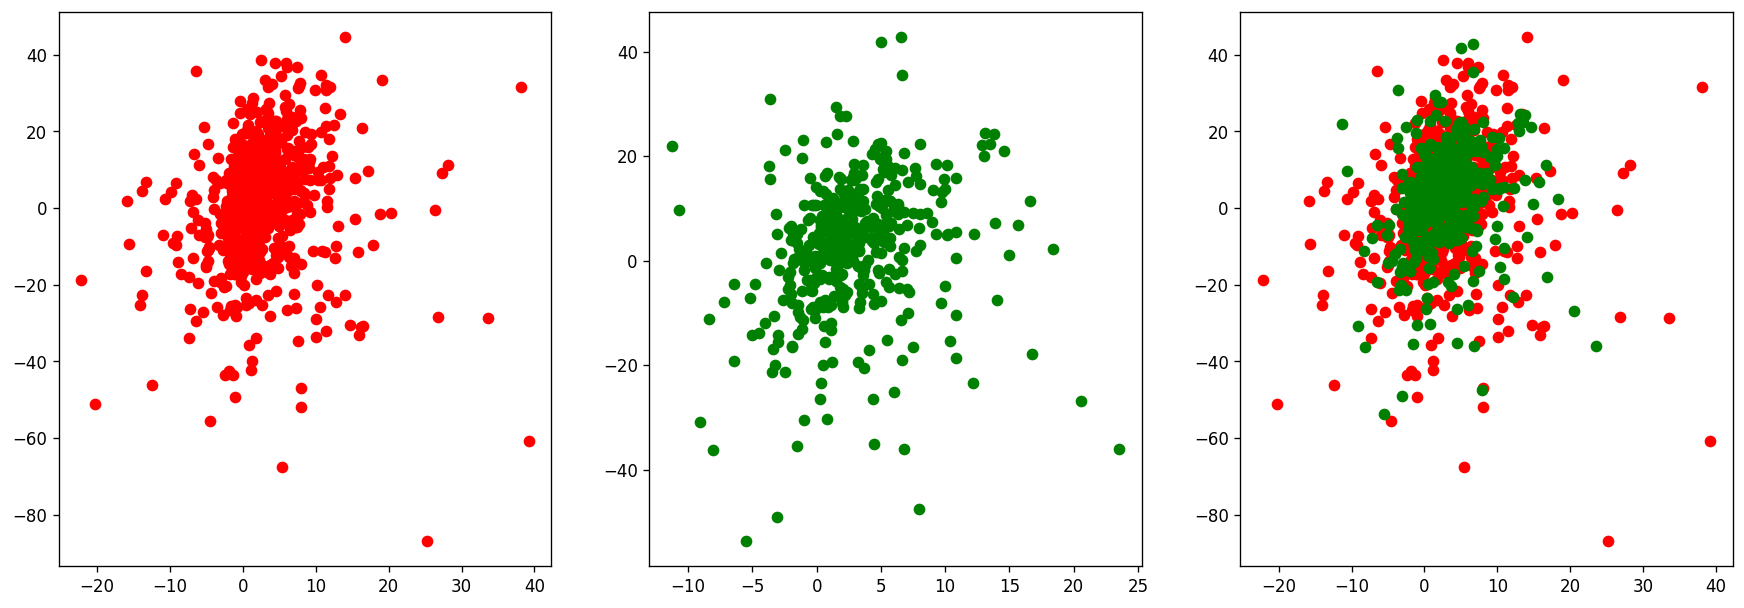

In [120]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['distance_1'], trap_signals['distance_2'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['distance_1'], real_signals['distance_2'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['distance_1'], trap_signals['distance_2'], c='red')
plt.scatter(real_signals['distance_1'], real_signals['distance_2'], c='green')

## 10. Price move (v2) & ATR & trap relationship

In [121]:
df10 = data[["Open", "Close", "High", "Low", "signal", "ATR", "trap"]].copy()
df10['price_move'] = df10['Close'] - df10['Close'].shift(2)
df10['price_move'] = round(df10['price_move'])
#
signal_data = df10[df10.signal != '']
signal_data.dropna(inplace=True)
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

<Axes: xlabel='price_move'>

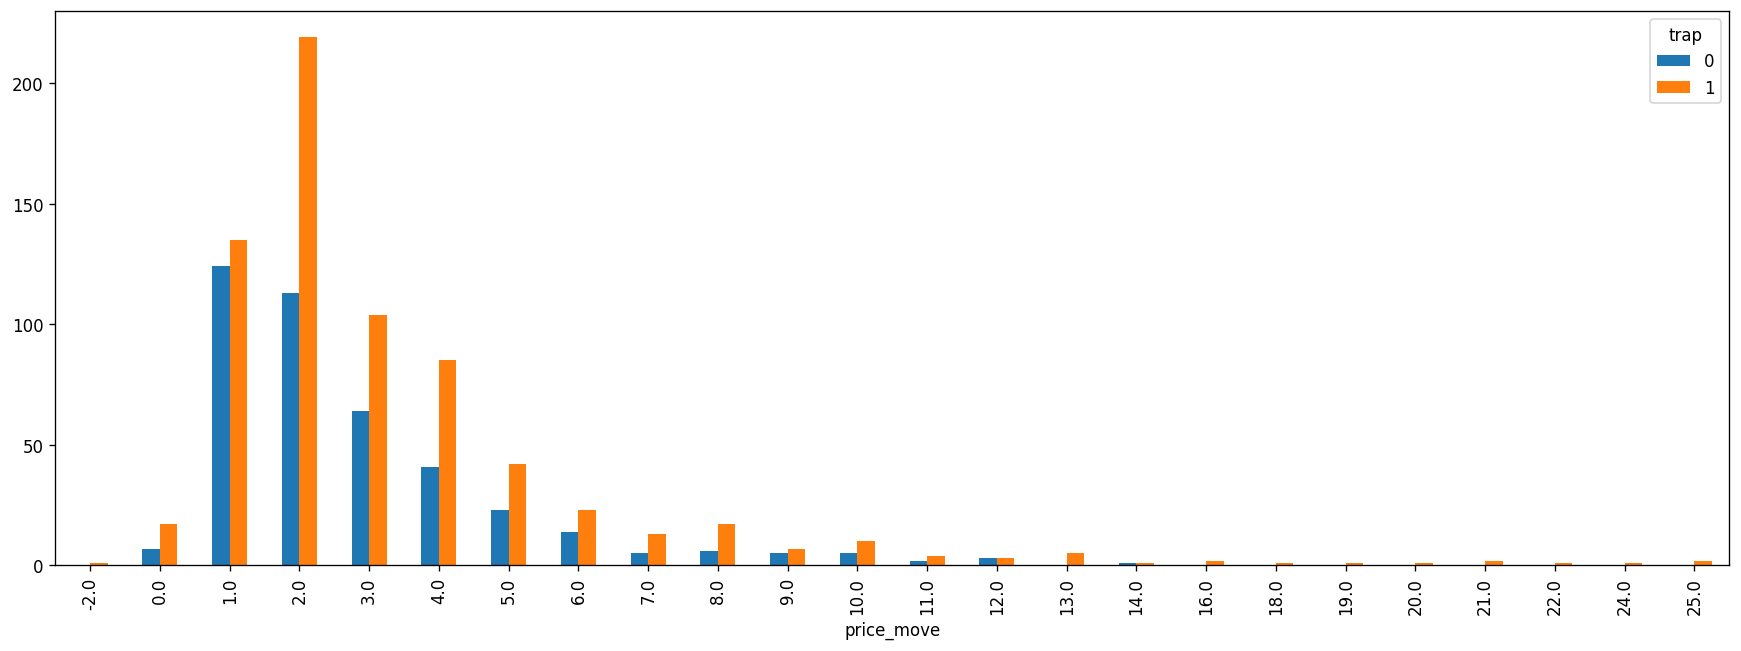

In [122]:
signal_group_by_price_move = signal_data.groupby(['price_move', 'trap'])['price_move'].count().rename({'price_move': 'count'})
signal_group_by_price_move.unstack().plot.bar()

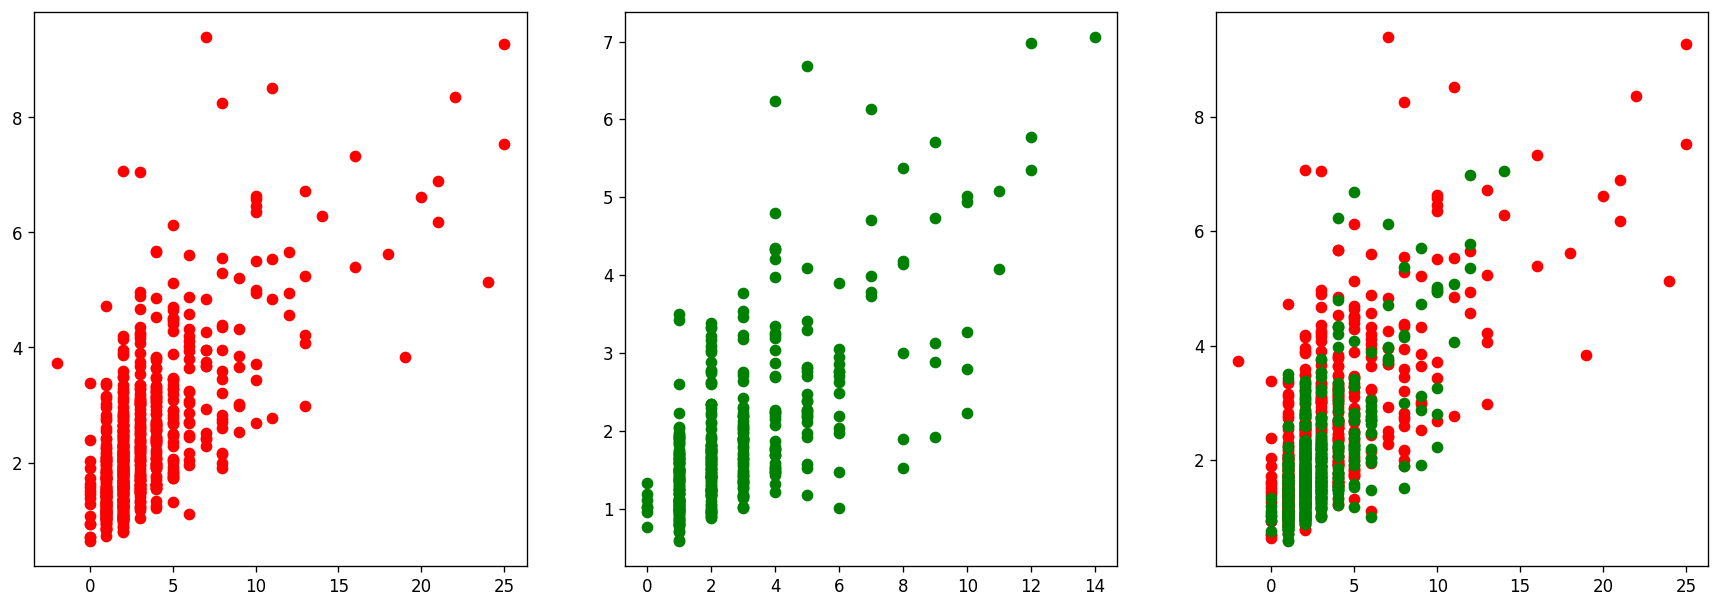

In [123]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['price_move'], trap_signals['ATR'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['price_move'], real_signals['ATR'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['price_move'], trap_signals['ATR'], c='red')
plt.scatter(real_signals['price_move'], real_signals['ATR'], c='green')

## 9. Distance from Close to EMA_26 & EMA_250

In [124]:
df9= data[["Open", "Close", "High", "Low", "signal", "trap"]].copy()
#
df9["ema_f"] = ta.ema(df9["Close"], length=26)
df9["ema_l"] = ta.ema(df9["Close"], length=250)
df9["distance_1"] = df9["Close"] - df9["ema_f"]
df9["distance_2"] = df9["Close"] - df9["ema_l"]
#
signal_data = df9[df9.signal != '']
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

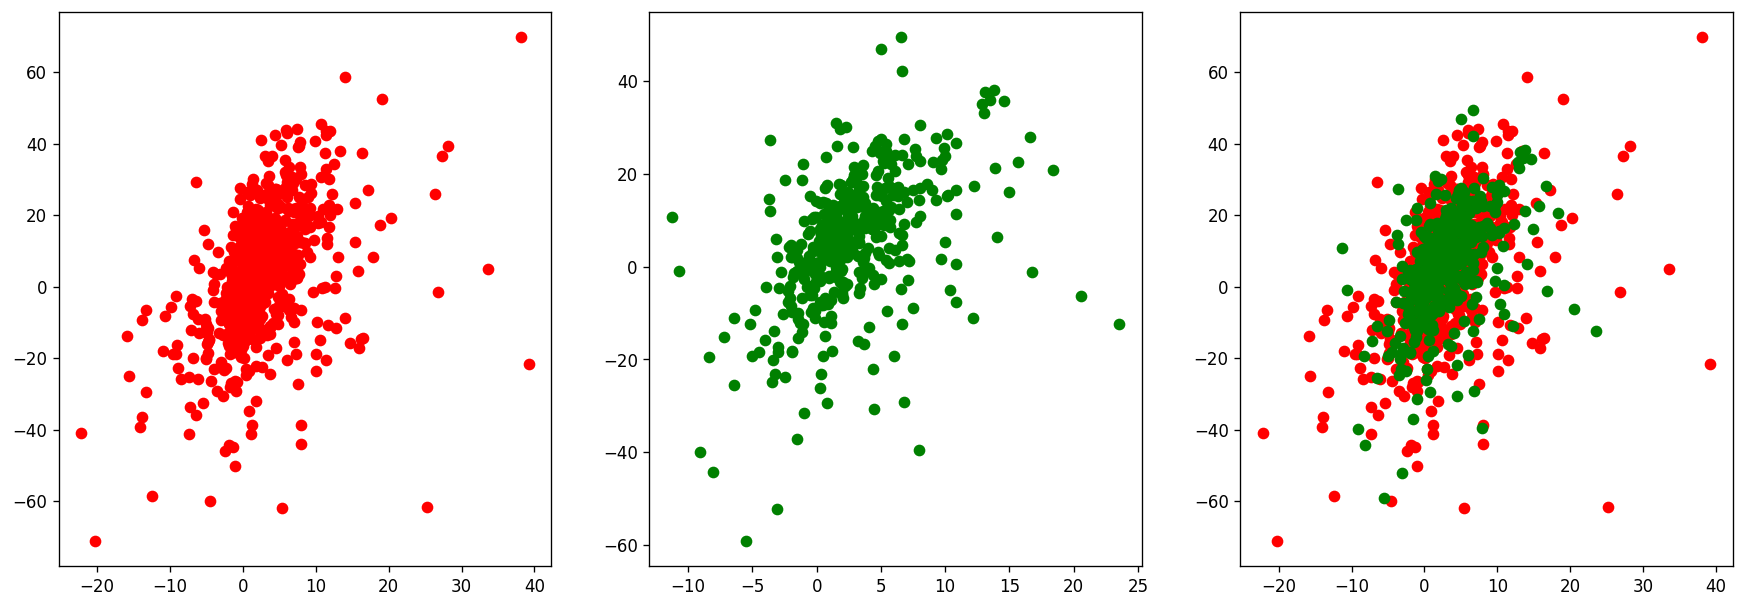

In [125]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['distance_1'], trap_signals['distance_2'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['distance_1'], real_signals['distance_2'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['distance_1'], trap_signals['distance_2'], c='red')
plt.scatter(real_signals['distance_1'], real_signals['distance_2'], c='green')

## 8. EMAs slope

In [126]:
df8 = data[["Open", "Close", "High", "Low", "signal", "trap"]].copy()
#
df8["ema"] = ta.ema(df8["Close"], length=20)
df8["ema_slope1"] = df8["ema"] - df8["ema"].shift(26)
df8["ema_slope1"] = round(df8["ema_slope1"])
df8["ema_slope2"] = df8["ema"] - df8["ema"].shift(51)
df8["ema_slope2"] = round(df8["ema_slope2"])
#
signal_data = df8[df8.signal != '']
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

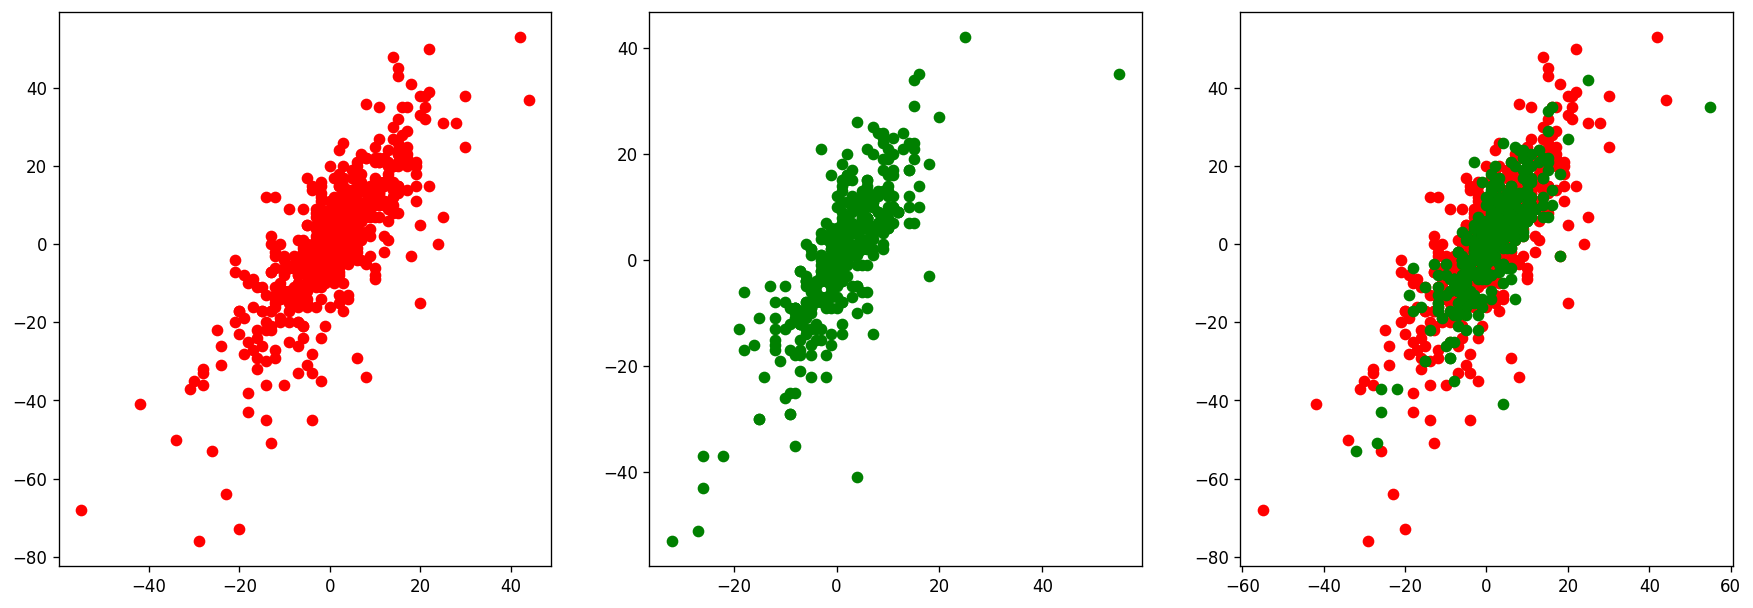

In [127]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['ema_slope1'], trap_signals['ema_slope2'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['ema_slope1'], real_signals['ema_slope2'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['ema_slope1'], trap_signals['ema_slope2'], c='red')
plt.scatter(real_signals['ema_slope1'], real_signals['ema_slope2'], c='green')

<Axes: xlabel='ema_slope1'>

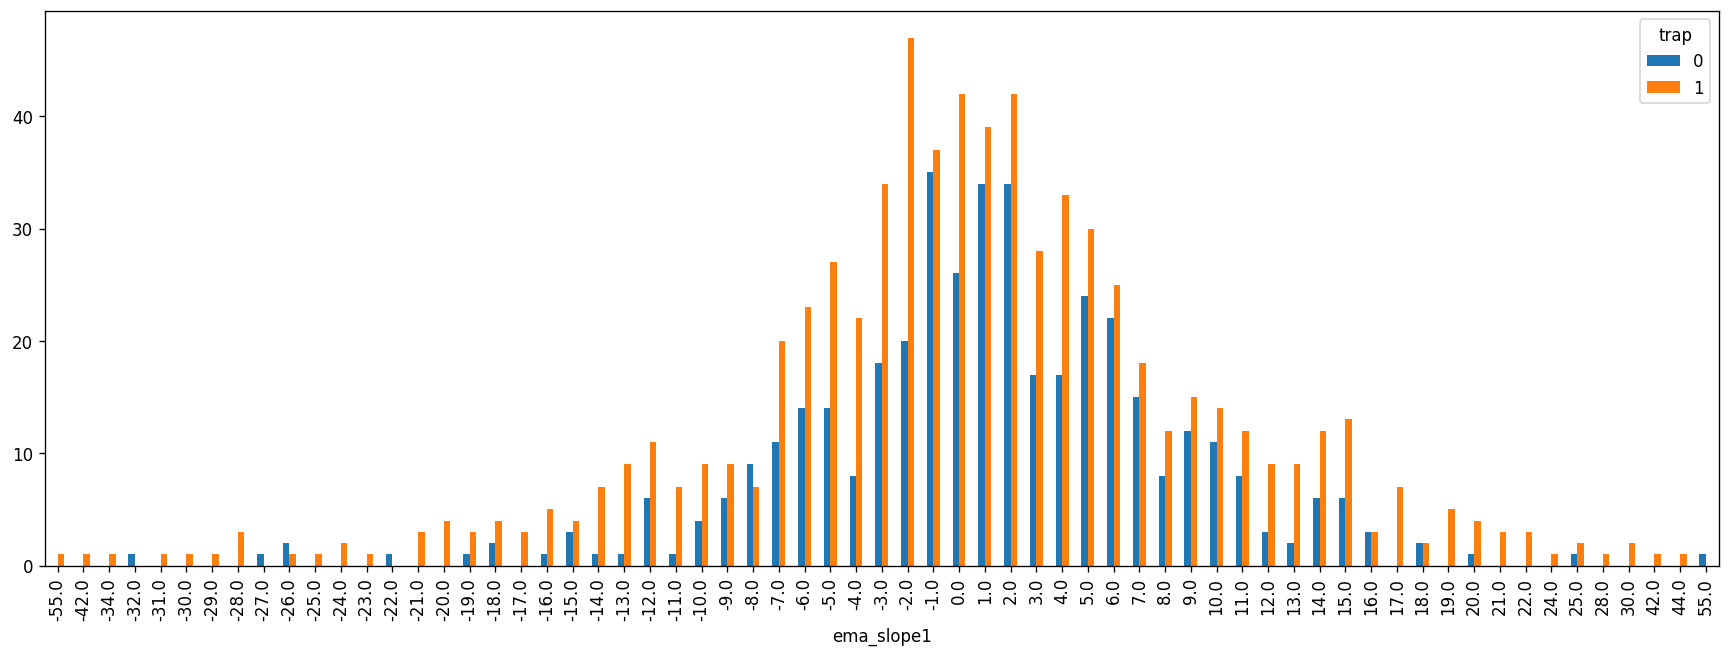

In [128]:
signal_group_by_ema_slope = signal_data.groupby(['ema_slope1', 'trap'])['ema_slope1'].count().rename({'ema_slope1': 'count'})
signal_group_by_ema_slope.unstack().plot.bar()

## 7. Time & couple_bars strength & trap relationship

In [129]:
df7 = data[["Open", "Close", "High", "Low", "signal", "trap"]].copy()
# couple bars strength = ((high - open) + (high - close)) / (2 * (high - low))
df7['couple_bars_strength'] = (2 * df7['Close'] - df7['Open'].shift(1) - df7['Close'].shift(1)) / (2 * df7['Close'] - 2 * df7['Low'].shift(1))
signal_data = df7[df7.signal != '']
signal_data.dropna(inplace=True)
signal_data['time_hm'] = 100 * signal_data.index.hour + signal_data.index.minute
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

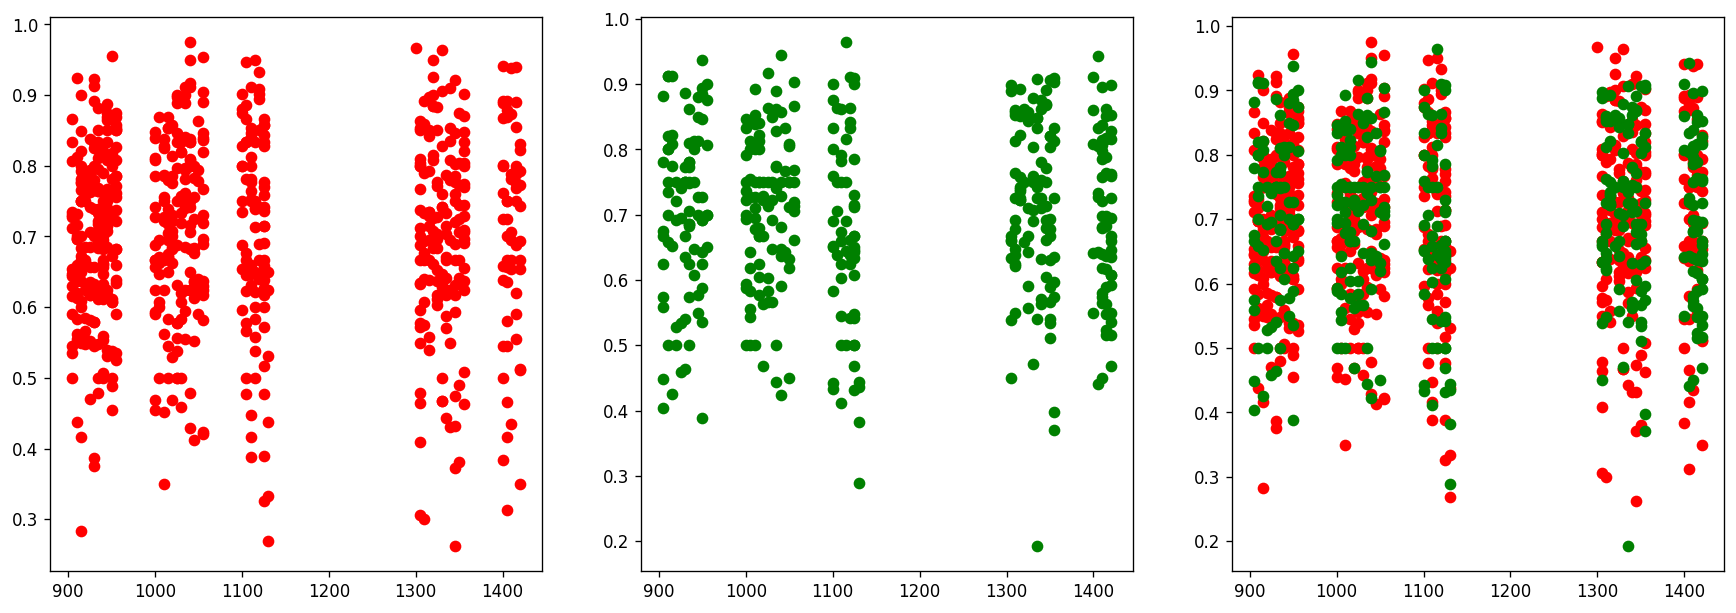

In [130]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['time_hm'], trap_signals['couple_bars_strength'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['time_hm'], real_signals['couple_bars_strength'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['time_hm'], trap_signals['couple_bars_strength'], c='red')
plt.scatter(real_signals['time_hm'], real_signals['couple_bars_strength'], c='green')

<Axes: xlabel='couple_bars_strength'>

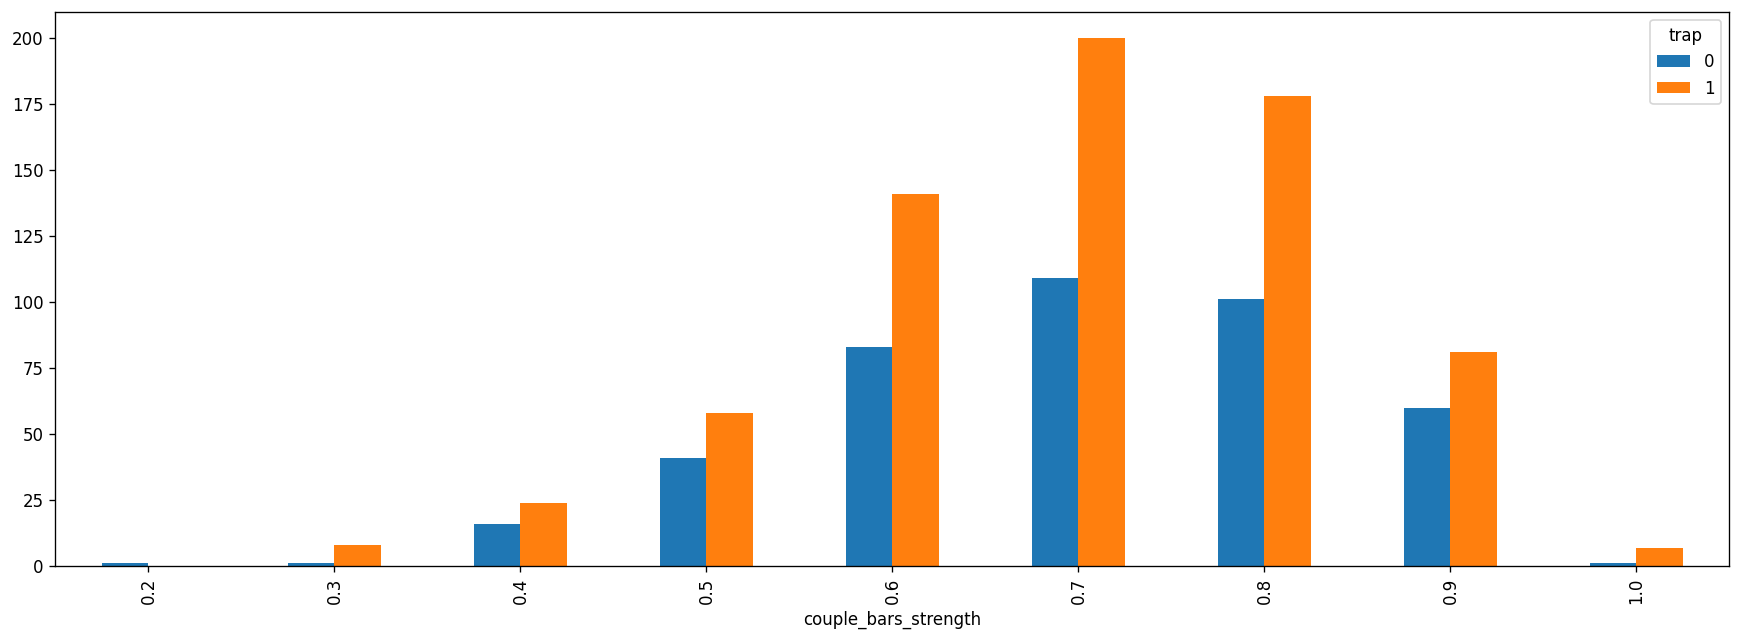

In [131]:
signal_data['couple_bars_strength'] = round(signal_data['couple_bars_strength'], 1)
signal_group_by_2bars_strength = signal_data.groupby(['couple_bars_strength', 'trap'])['couple_bars_strength'].count().rename({'couple_bars_strength': 'count'})
signal_group_by_2bars_strength.unstack().plot.bar()

## 6. Trend strength & MACD momentum & trap relationship

In [132]:
df6 = data[["Open", "Close", "High", "Low", "signal", "MACDh", "ADX42", "trap"]].copy()
signal_data = df6[df6.signal != '']
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

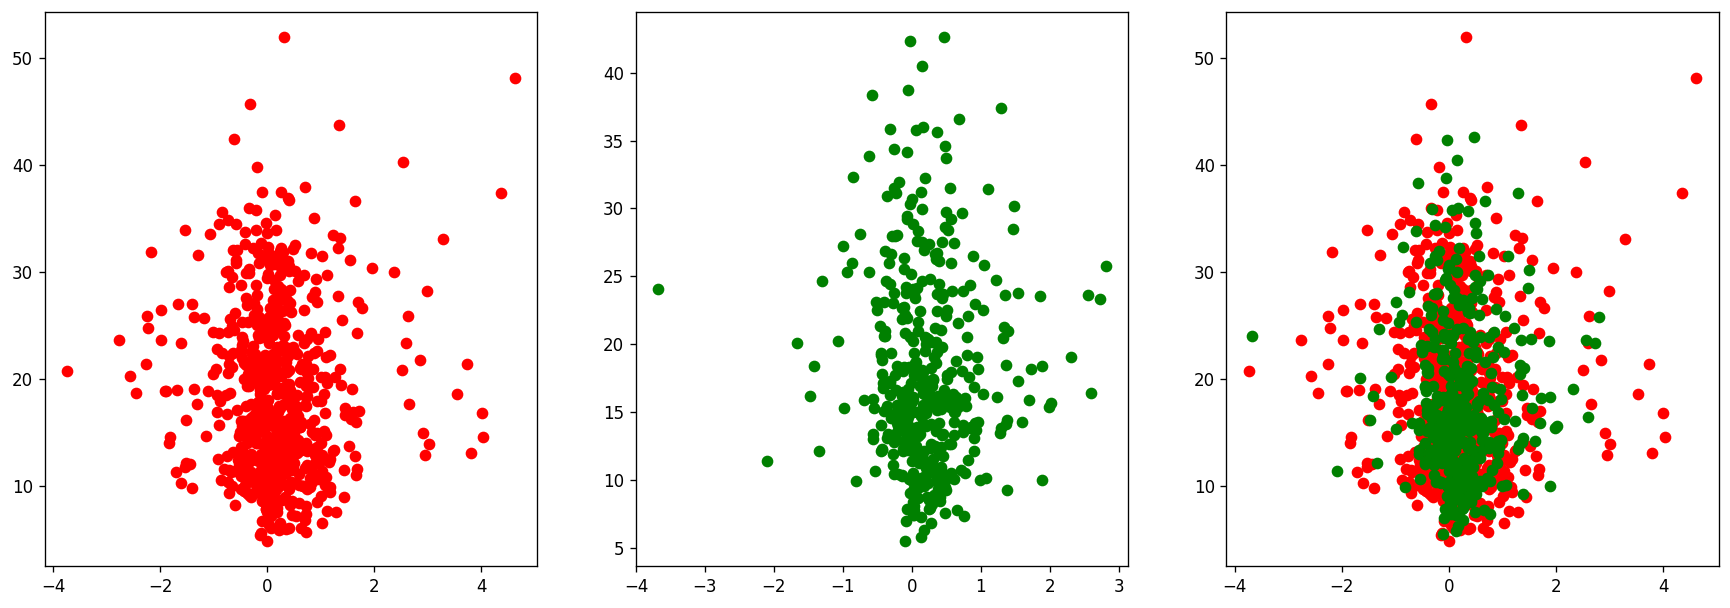

In [133]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['MACDh'], trap_signals['ADX42'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['MACDh'], real_signals['ADX42'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['MACDh'], trap_signals['ADX42'], c='red')
plt.scatter(real_signals['MACDh'], real_signals['ADX42'], c='green')

## 5. Trend strength ADX & trap relationship

In [134]:
df5 = data[["Open", "Close", "High", "Low", "signal", "ADX5", "ADX42", "trap"]].copy()
signal_data = df5[df5.signal != '']
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

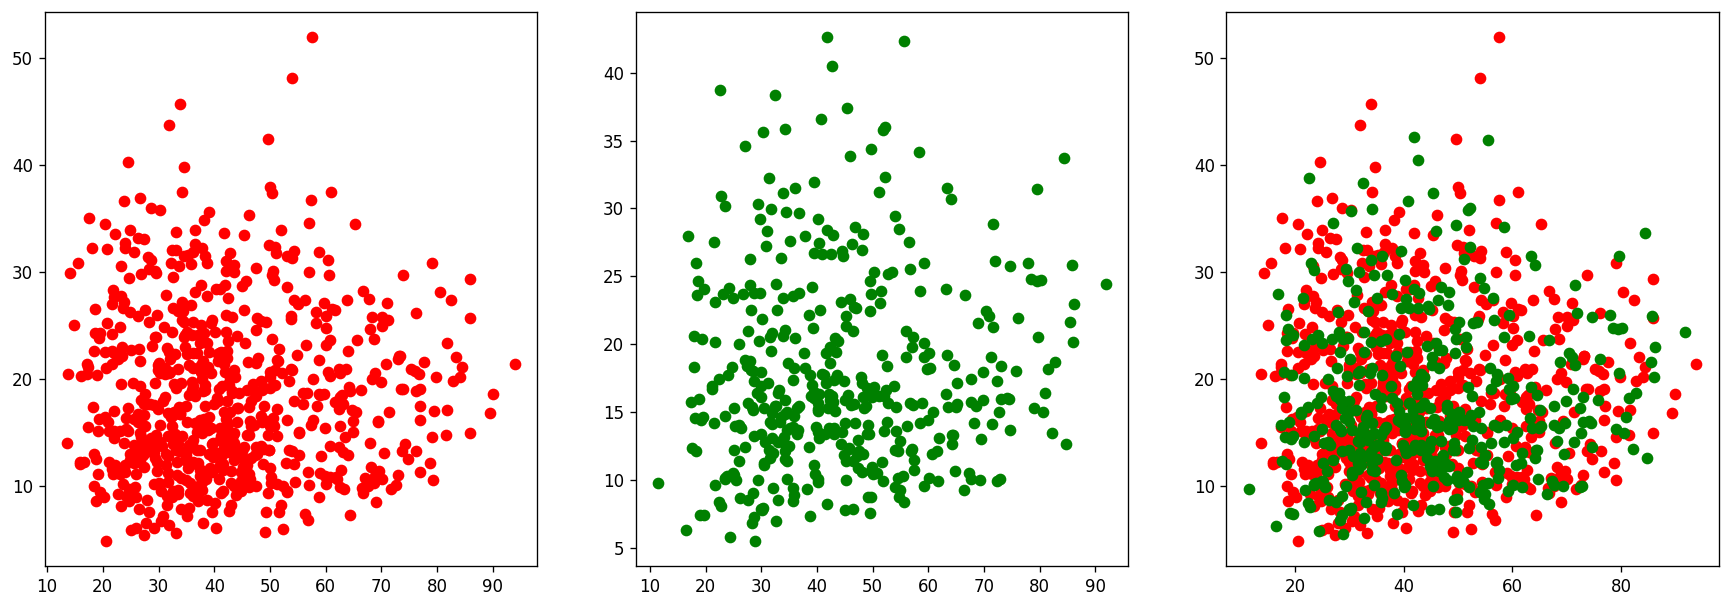

In [135]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['ADX5'], trap_signals['ADX42'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['ADX5'], real_signals['ADX42'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['ADX5'], trap_signals['ADX42'], c='red')
plt.scatter(real_signals['ADX5'], real_signals['ADX42'], c='green')

## 4. Price move & ATR & trap relationship

In [136]:
df4 = data[["Open", "Close", "High", "Low", "signal", "ATR", "trap"]].copy()
df4['price_move'] = df4['Close'] - df4['Close'].shift(1)
signal_data = df4[df4.signal != '']
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

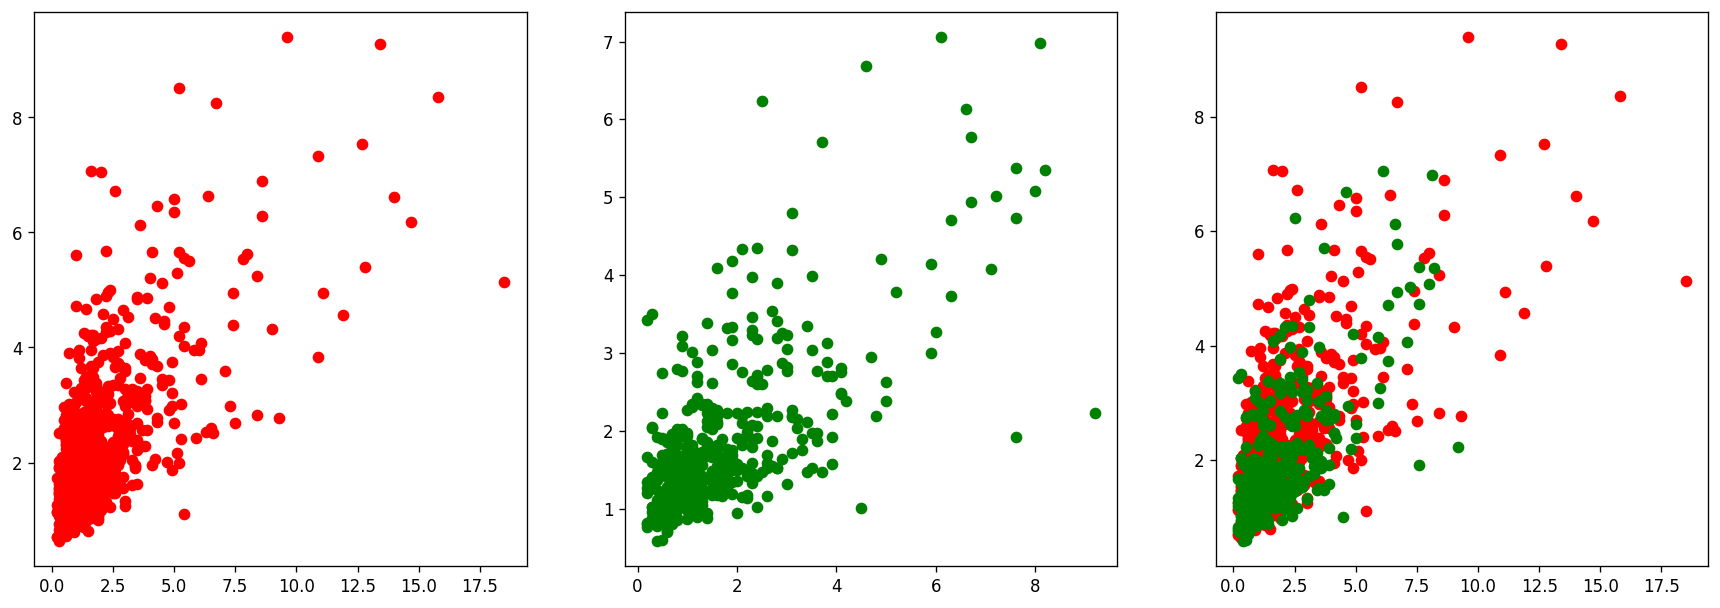

In [137]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['price_move'], trap_signals['ATR'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['price_move'], real_signals['ATR'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['price_move'], trap_signals['ATR'], c='red')
plt.scatter(real_signals['price_move'], real_signals['ATR'], c='green')

## 3. Min-Max last 20 & current price & trap relationship

In [138]:
df1 = data[["Open", "Close", "High", "Low", "signal", "RSI", "trap"]].copy()
df1['max_close20'] = df1['Close'].rolling(20).max()
df1['min_close20'] = df1['Close'].rolling(20).min()
df1['diff_to_max'] = df1['Close'] / df1['max_close20']
df1['diff_to_max'] = round(df1['diff_to_max'], 3)
df1['diff_to_min'] = df1['Close'] / df1['min_close20']
df1['diff_to_min'] = round(df1['diff_to_min'], 3)
signal_data = df1[df1.signal != '']
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

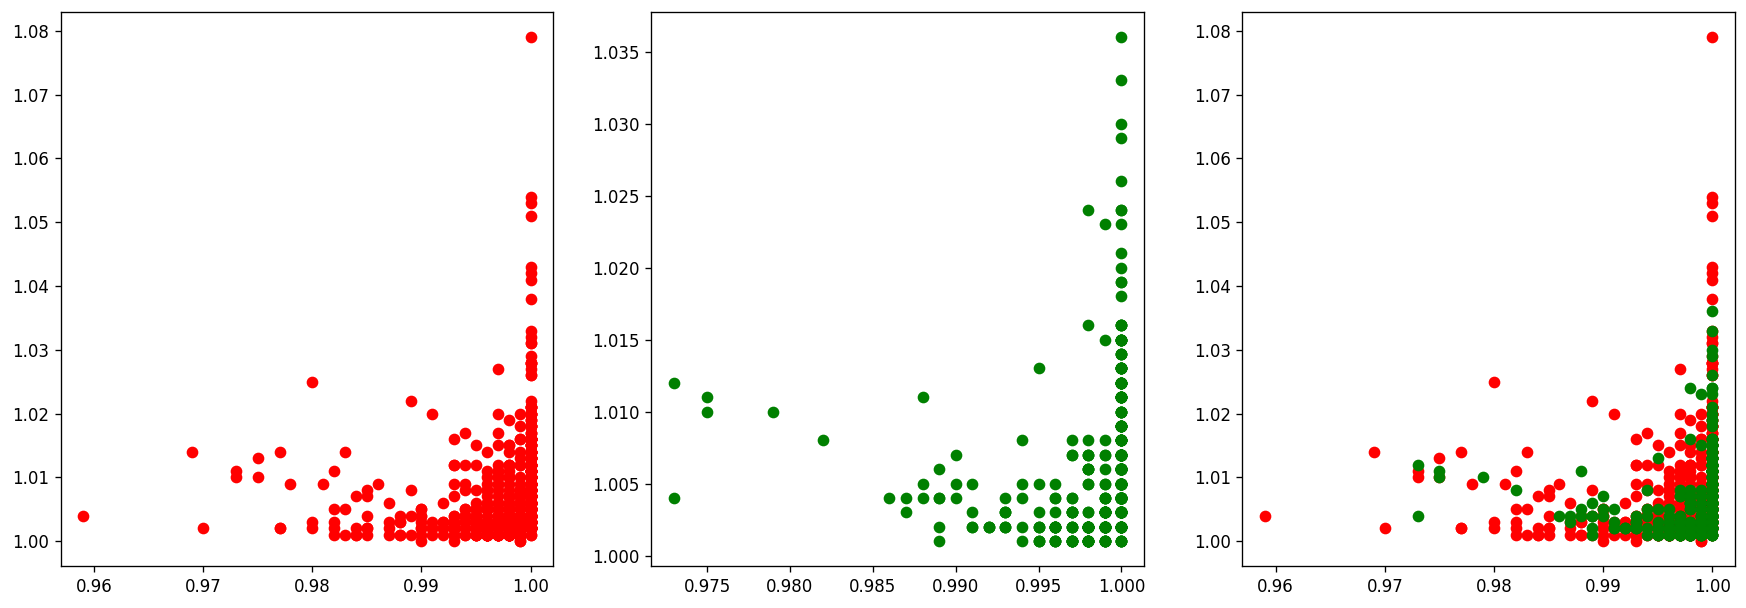

In [139]:
plt.subplot(1, 3, 1)
plt.scatter(trap_signals['diff_to_max'], trap_signals['diff_to_min'], c='red')
plt.subplot(1, 3, 2)
plt.scatter(real_signals['diff_to_max'], real_signals['diff_to_min'], c='green')
plt.subplot(1, 3, 3)
plt.scatter(trap_signals['diff_to_max'], trap_signals['diff_to_min'], c='red')
plt.scatter(real_signals['diff_to_max'], real_signals['diff_to_min'], c='green')

## 2. Divergence RSI & trap relationship visualize

In [140]:
df2 = data[["Open", "Close", "High", "Low", "signal", "RSI", "trap"]].copy()
# Identify Lower Low (LL) and Higher RSI
df2['LL'] = df2['Low'] < df2['Low'].shift(1).rolling(20).min() - 0.1
df2['Higher_RSI'] = df2['RSI'] > df2['RSI'].shift(1).rolling(20).min()
# Find divergence signals
df2['bullish_signal'] = df2.apply(lambda r: 1 if r['LL'] & r['Higher_RSI'] else 0, axis=1)
# Identify Higher High (HH) and Lower RSI
df2['HH'] = df2['High'] > df2['High'].shift(1).rolling(20).max() + 0.1
df2['Lower_RSI'] = df2['RSI'] < df2['RSI'].shift(1).rolling(20).max()
# Find divergence signals
df2['bearish_signal'] = df2.apply(lambda r: 1 if r['HH'] & r['Lower_RSI'] else 0, axis=1)
# Bullish Fair Value Gap: Previous High < Next Low (Upward imbalance)
df2["Bullish_FVG"] = df2["High"].shift(2) < df2["Low"]
df2['Bullish_FVG'] = df2.apply(lambda r: 1 if r['Bullish_FVG'] else 0, axis=1)
# Bearish Fair Value Gap: Previous Low > Next High (Downward imbalance)
df2["Bearish_FVG"] = df2["Low"].shift(2) > df2["High"]
df2['Bullish_FVG'] = df2.apply(lambda r: 1 if r['Bearish_FVG'] else 0, axis=1)
df2.dropna(inplace=True)
df2['pass_bearish_signal'] = df2['bearish_signal'].rolling(10).sum()
df2['pass_bullish_signal'] = df2['bullish_signal'].rolling(10).sum()
df2['pass_bearish_fvg'] = df2['Bearish_FVG'].rolling(10).sum()
df2['pass_bullish_fvg'] = df2['Bullish_FVG'].rolling(10).sum()
signal_data = df2[df2.signal != '']
signal_data.dropna(inplace=True)

<Axes: xlabel='RSI'>

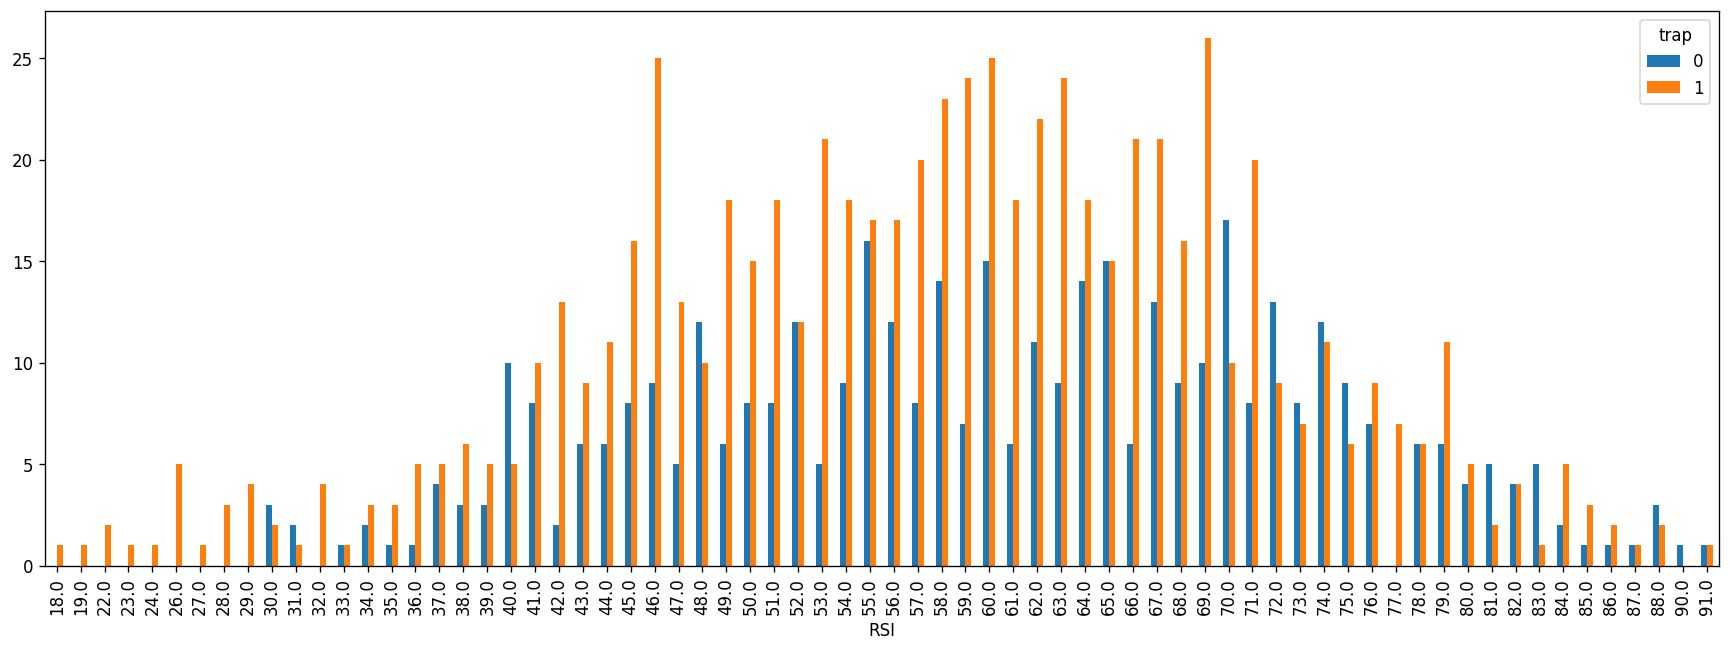

In [141]:
group_by_rsi = signal_data.groupby(['RSI', 'trap'])['RSI'].count().rename({'RSI': 'count'})
group_by_rsi.unstack().plot.bar()

## 1. Time & Trap relationship visualize

In [142]:
df3 = data[["Open", "Close", "High", "Low", "signal", "RSI", "trap"]].copy()
signal_data = df3[df3.signal != '']
signal_data['hour'] = signal_data.index.hour
signal_data['minute'] = signal_data.index.minute
signal_data['day'] = signal_data.index.day
signal_data['month'] = signal_data.index.month
signal_data['year'] = signal_data.index.year
signal_data['dow'] = signal_data.index.day_of_week
signal_data['time_hm'] = 100 * signal_data.index.hour + signal_data.index.minute
#
trap_signals = signal_data[signal_data.trap == 1]
real_signals = signal_data[signal_data.trap == 0]

<Axes: xlabel='time_hm'>

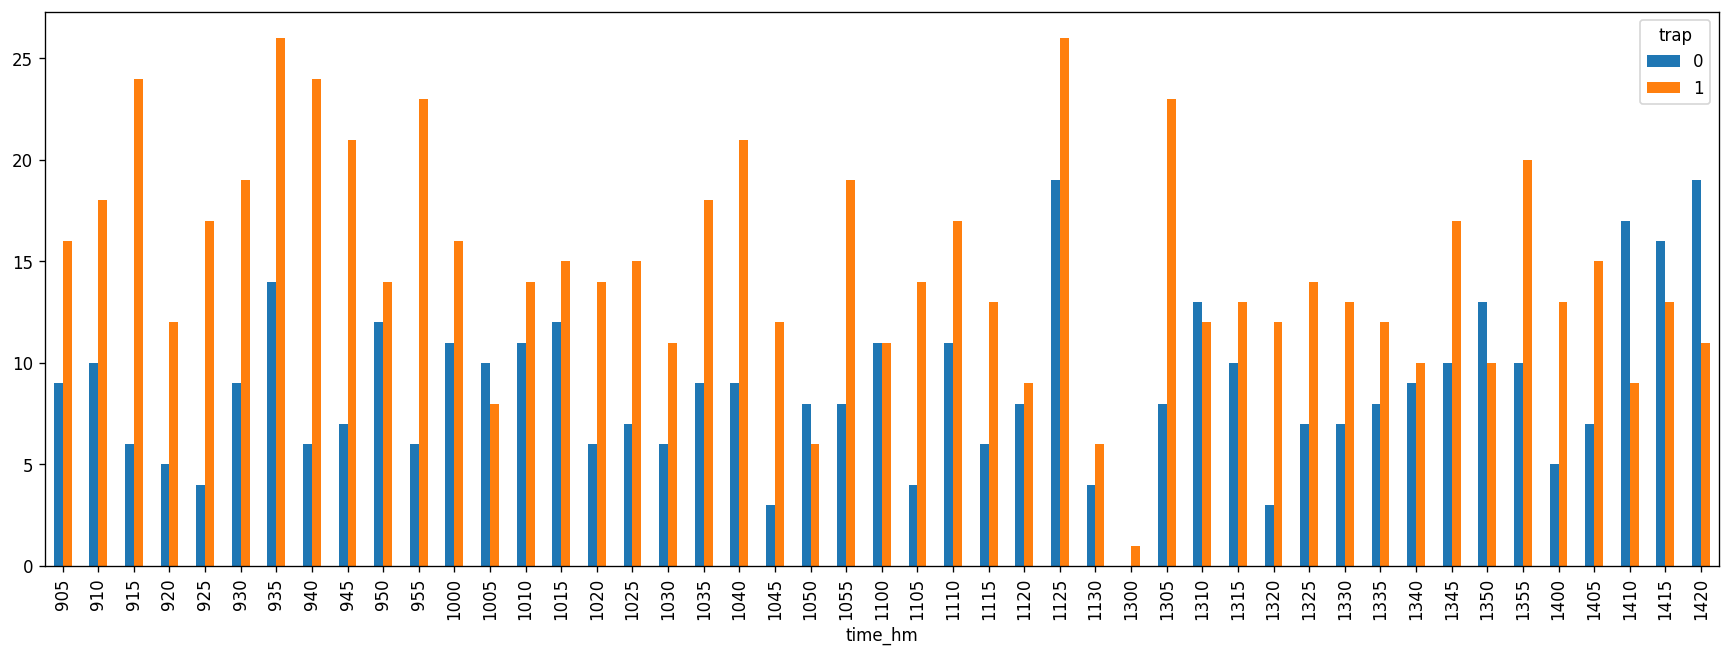

In [143]:
group_by_time_hm = signal_data.groupby(['time_hm', 'trap'])['time_hm'].count().rename({'time_hm': 'count'})
group_by_time_hm.unstack().plot.bar()

<Axes: xlabel='hour'>

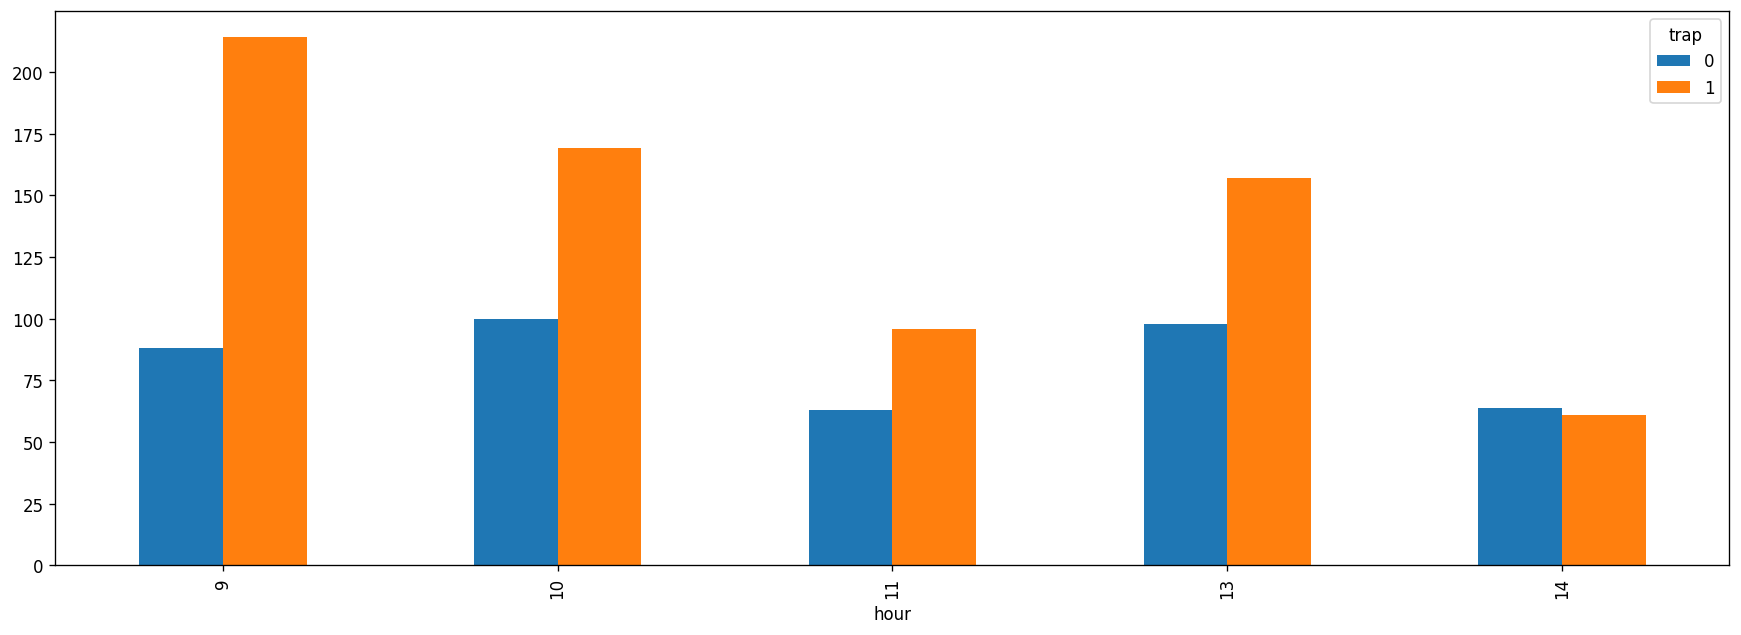

In [144]:
group_by_hour = signal_data.groupby(['hour', 'trap'])['hour'].count().rename({'hour': 'count'})
group_by_hour.unstack().plot.bar()

<Axes: xlabel='minute'>

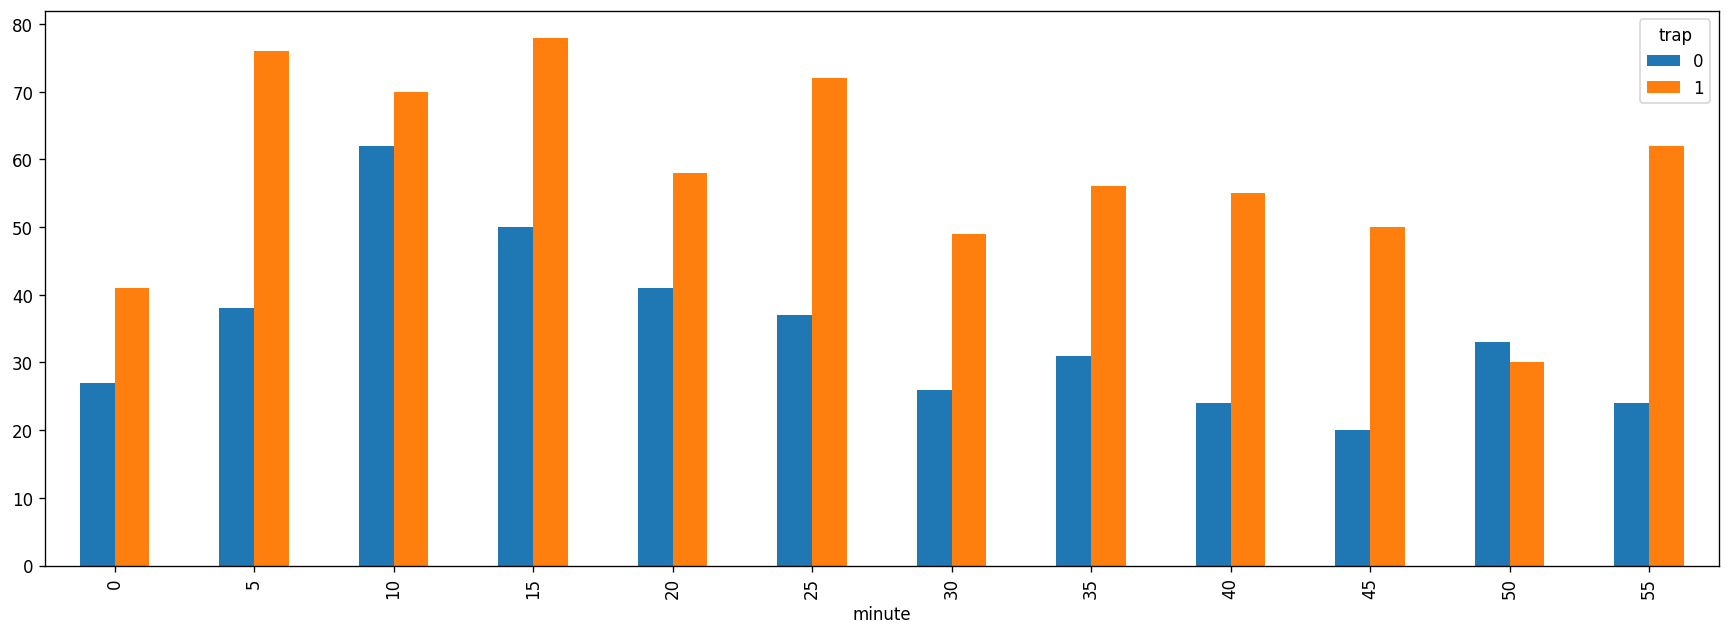

In [145]:
group_by_minute = signal_data.groupby(['minute', 'trap'])['minute'].count().rename({'minute': 'count'})
group_by_minute.unstack().plot.bar()

<Axes: xlabel='day'>

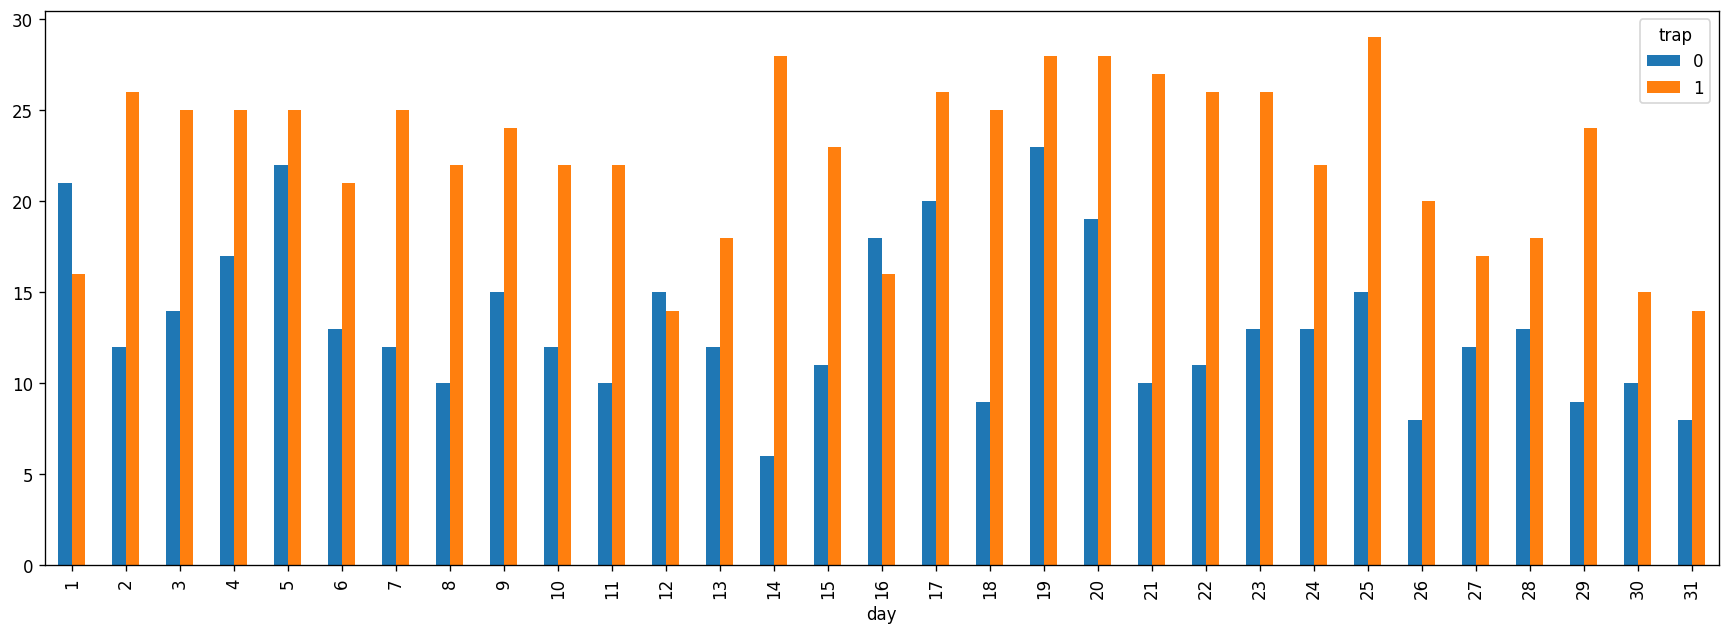

In [146]:
group_by_day = signal_data.groupby(['day', 'trap'])['day'].count().rename({'day': 'count'})
group_by_day.unstack().plot.bar()

<Axes: xlabel='month'>

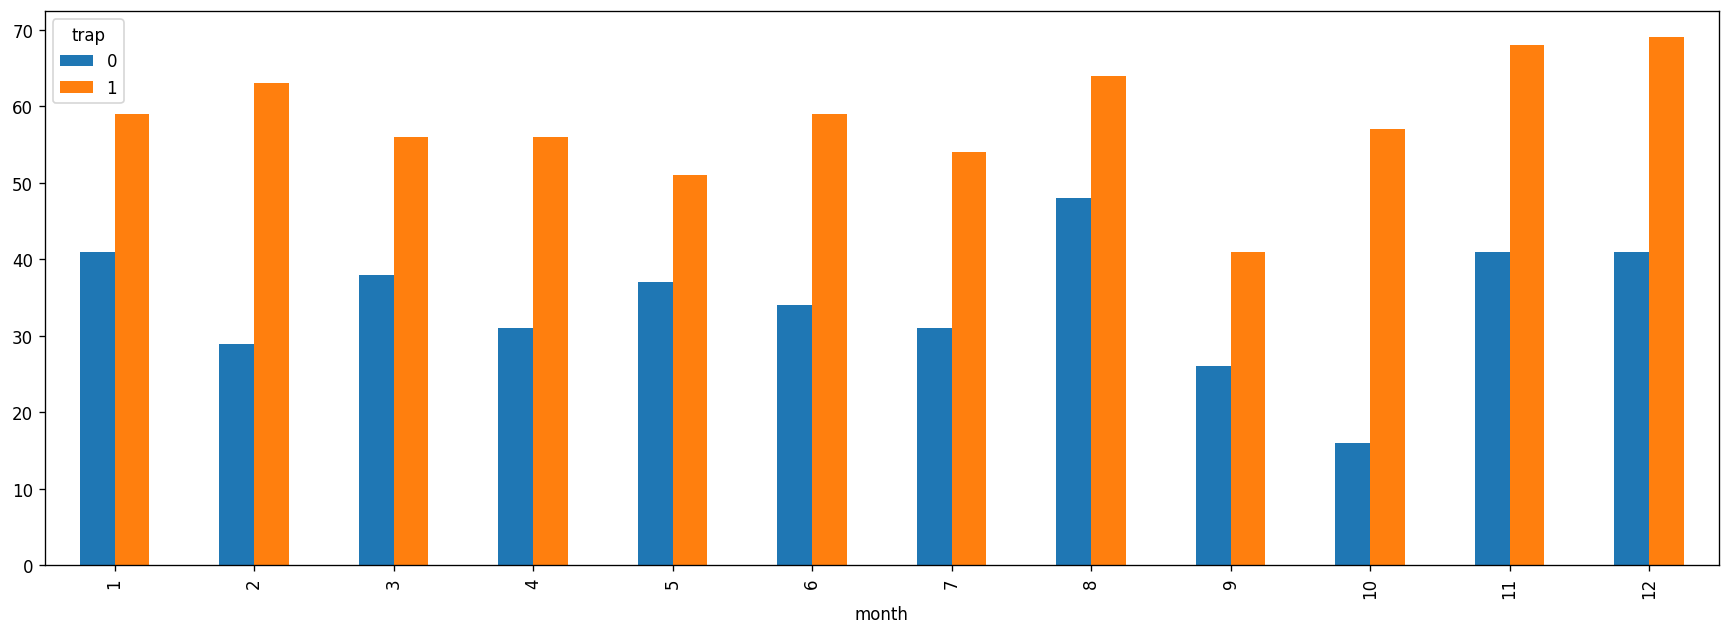

In [147]:
group_by_month = signal_data.groupby(['month', 'trap'])['month'].count().rename({'month': 'count'})
group_by_month.unstack().plot.bar()

<Axes: xlabel='year'>

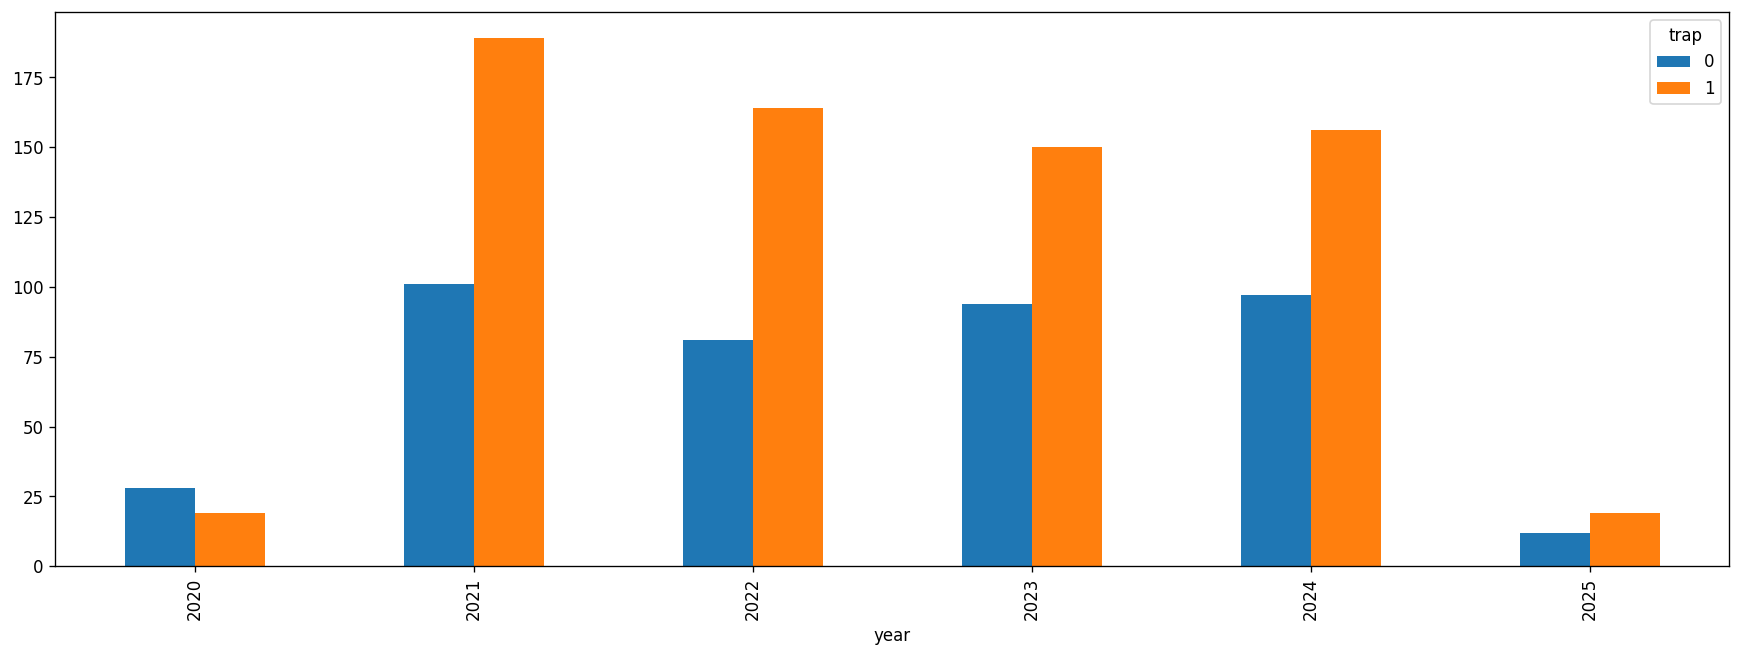

In [148]:
group_by_year = signal_data.groupby(['year', 'trap'])['year'].count().rename({'year': 'count'})
group_by_year.unstack().plot.bar()

<Axes: xlabel='dow'>

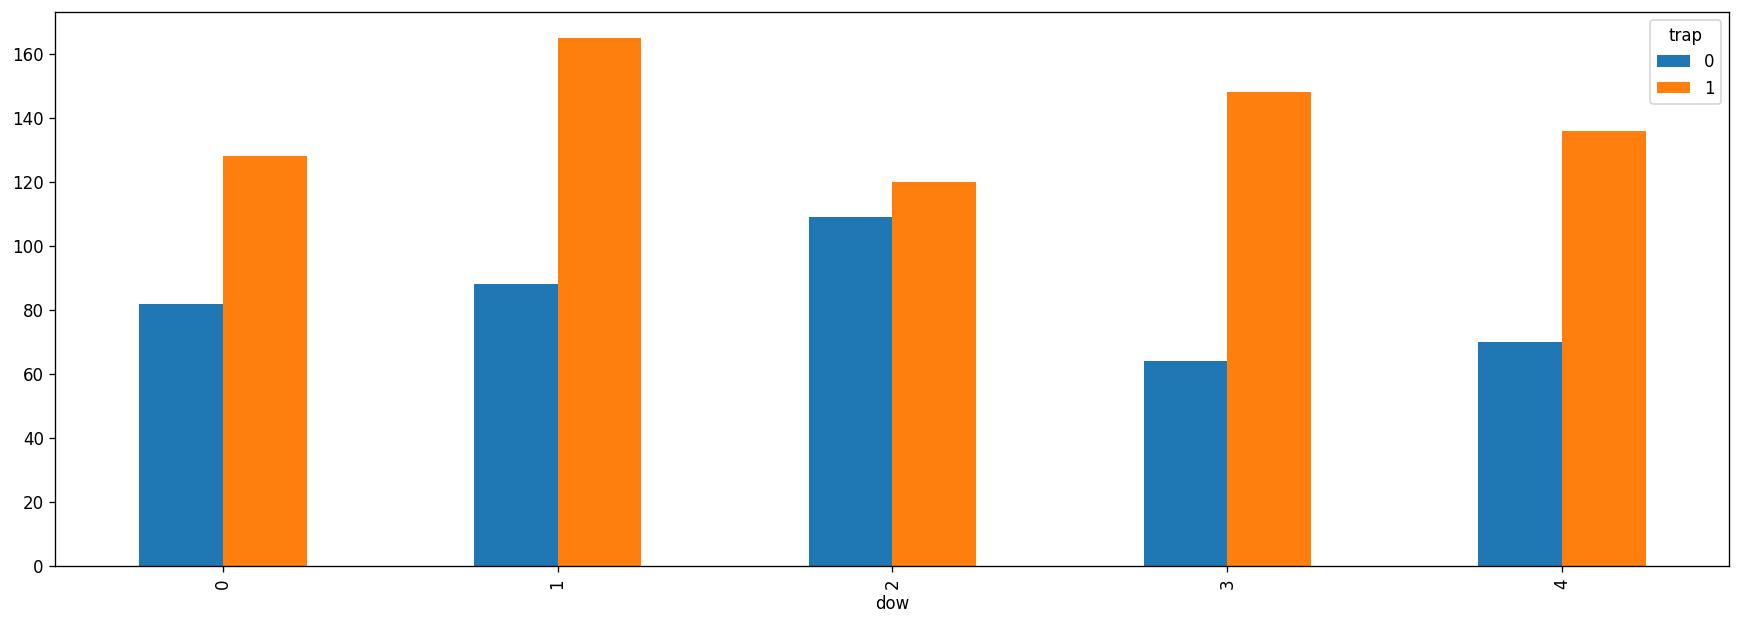

In [149]:
group_by_dow = signal_data.groupby(['dow', 'trap'])['dow'].count().rename({'dow': 'count'})
group_by_dow.unstack().plot.bar()